In [1]:
#Carga de librerias
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import os 
from pathlib import Path
import pandas as pd
#%matplotlib inline
#%matplotlib notebook
import cv2
from pylab import *             # importar todas las funciones de pylab, en particular poder trabajar
                                # con "xticks" y "yticks"
from scipy.fft import ifftn
from numpy import fft as fft


from scipy.optimize import curve_fit
from matplotlib import gridspec
from matplotlib.patches import Ellipse
from lmfit.models import LinearModel, ConstantModel
from lmfit import Parameters, Model
from lmfit import conf_interval
import glob
#from numpy import fft as fft
#from sklearn.metrics import r2_score

#import matplotlib.pyplot as plt
#from numpy import exp, loadtxt, pi, sqrt

#from lmfit import Model
#from numpy import exp, linspace, random
#import BeamProfilerCopy as bp

import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.special import erf  # Importar erf desde scipy.special

In [3]:
general_path_figure = 'C:\\Users\\dell 5810\\SynologyDrive\\projects\\propagation_of_vortices\\figures\\navaja'

In [5]:
#Escala de color de Negro a Azul definida como my_cmap3

#plt.figure()
a=np.outer(np.arange(0,1,0.01),np.ones(10))
cdict3 = {'red':   [(0.0,  0.0, 0.0),
                    (0.4,  0.0, 0.0),
                    (0.50,  0.0, 0.0),
                    (1.0, 1.0, 1.0)],
         'green': [(0.0,  0.0, 0.0),
                   (0.4, 0.5, 0.5),
                   (0.70,  1.0, 1.0),
                   (1.0, 1.0, 1.0)],
     'blue':  [(0.0,  0.0, 0.0),
               (0.4,  1.0, 1.0),
               (0.70,  1.0, 1.0),
               (1.0 , 1.0 , 1.0)]} 
my_cmap3 = matplotlib.colors.LinearSegmentedColormap('my_colormap3',cdict3,256)
#plt.imshow(a,aspect='auto', cmap = my_cmap3)                   
#plt.show()

In [6]:
def twoD_Gaussian(xy, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    x, y = xy
    xo = float(xo)
    yo = float(yo)
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo)
                            + c*((y-yo)**2)))
    return g.ravel()

In [9]:
def Gaussian_2d(xy,A,mu_x,mu_y,sigma_x,sigma_y):
    x, y = xy
    mu_x = float(mu_x)
    mu_y = float(mu_y)
    #G= A*np.exp(-(x-mu_x)**2/(2*sigma_x**2) - (y-mu_y)**2/(2*sigma_y**2))
    G= A*np.exp(-(x-mu_x)**2/(sigma_x**2) - (y-mu_y)**2/(sigma_y**2))
    return G.ravel()

In [11]:
ruta1 = os.path.realpath("20240920-desintonia-776")

In [13]:
os.getcwd()

'C:\\Users\\dell 5810\\SynologyDrive\\projects\\propagation_of_vortices\\scripts\\Analisis'

In [15]:
#general_path = '/Users/lafrioc/lafrioc/projects/propagation_of_vortices/data/Gauss/'
general_path = '\\Users\\dell 5810\\SynologyDrive\\projects\\propagation_of_vortices\\data\\Gauss\\'

In [17]:
ruta2 = general_path + '20241213-haz-420/'
ruta3 = general_path + '776/20241213/'
ruta4 = general_path + '420\\20250107-distancia\\'
ruta5 = general_path + '776\\20241213\\'
#ruta5 = general_path + '20241011-vortices-vs-distancia/20241011vortice-vs-desintonia/'
#ruta6 = general_path + '20241015-2vortices-vs-distancia776/'
#ruta7 = general_path + '20241015-2vortices-vs-distancia776/2vortices-420/'
#ruta11 = general_path + '20241108-1y2vortices-vs-distancia/20241108-2vortices/'
#ruta8 = general_path + '20241114-4vortices-vs-distancia/'
#ruta9 = general_path + '20241114-4vortices-vs-distancia/776/'
#ruta10 = general_path + '20241128-2vortices-vs-distancia/'
#ruta12 = general_path + '20241202-4vortices-vs-distancia/'

In [19]:
# Ruta para fotos de 2 y 4 vortices con una separacion de 40 px
Gauss_420 = np.array(list(sorted(Path(ruta2).glob('20241213-azul-d*.jpg'))))
Gauss_420_2 = np.array(list(sorted(Path(ruta4).glob('20250107_*mm.jpg'))))
Gauss_780 = np.array(list(sorted(Path(ruta3).glob('20241213_780_*mm.jpg'))))
Gauss_776 = np.array(list(sorted(Path(ruta3).glob('20241213_776_*mm.jpg'))))
Gauss_780.shape

(36,)

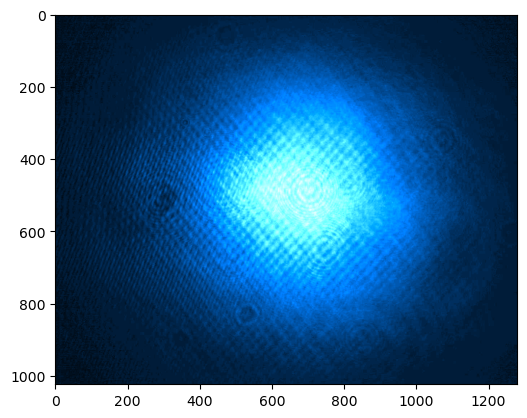

In [21]:
prueba0 = mpimg.imread(Gauss_780[0]) 
prueba30 = np.array((prueba0),dtype=int)[:,:,0]
plt.imshow(prueba30, cmap = my_cmap3)  #tamaño:  (150,150)
plt.show()
#prueba0

In [22]:
#prueba30.reshape(201, 201)

In [25]:
im = cv2.imread(Gauss_780[0])
im = np.array((im),dtype=int)[:,:,0]
    #im = cv2.imread(r"path_to_load\im.png", -1) 
h, w = im.shape
data = im.ravel()
    
x = np.linspace(0, w, w)
y = np.linspace(0, h, h)
x, y = np.meshgrid(x, y)
    
    # initial guess of parameters: amplitude, xo, yo, sigma_x, sigma_y, theta, offset
initial_guess = (50, 700, 500, 120, 129)
    
    # find the optimal Gaussian parameters
popt, pcov = curve_fit(Gaussian_2d, (x, y), data, p0=initial_guess) 
#popt, pcov = curve_fit(twoD_Gaussian, (x, y), data, p0=initial_guess) 
    
# create new data with these parameters
data_fitted = Gaussian_2d((x, y), *popt)
data_fitted =data_fitted.reshape(h,w)
print(popt)


[ 75.73783939 688.01249851 504.32751921 393.15739729 371.57429469]


In [30]:
from PIL import Image


# Cargar la imagen
im = cv2.imread(Gauss_780[35])


# Definir las coordenadas de la región (esquina superior izquierda y esquina inferior derecha)
x2=1440

x = []
for i in range (0,101):
    x1 =int(np .floor (  i*1440 /101) )
    x.append(x1)

y1, y2 = 0, 1260 # Coordenada (x2, y2) es la esquina inferior derecha



In [32]:

#img_array01=np.array(im) 
#img_array01[y1:y2, x[1]:x2] = 0

#img_modified01 = Image.fromarray(img_array01)
#img_modified01.show()

In [34]:

# Cambiar los valores de la región definida a ceros
img_array01 = np.array(im) 
img_array02 = np.array(im) 
img_array03 = np.array(im) 
img_array04 = np.array(im) 
img_array05 = np.array(im) 
img_array06 = np.array(im) 
img_array07 = np.array(im) 
img_array08 = np.array(im) 
img_array09 = np.array(im) 
img_array10 = np.array(im)
img_array11 = np.array(im)
img_array12 = np.array(im)
img_array13 = np.array(im)
img_array14 = np.array(im)
img_array15 = np.array(im)
img_array16 = np.array(im)
img_array17 = np.array(im)
img_array18 = np.array(im)
img_array19 = np.array(im)
img_array20 = np.array(im)
img_array21 = np.array(im)
img_array22 = np.array(im)
img_array23 = np.array(im)
img_array24 = np.array(im)
img_array25 = np.array(im)
img_array26 = np.array(im)
img_array27 = np.array(im)
img_array28 = np.array(im)
img_array29 = np.array(im)
img_array30 = np.array(im)
img_array31 = np.array(im)
img_array32 = np.array(im)
img_array33 = np.array(im)
img_array34 = np.array(im)
img_array35 = np.array(im)
img_array36 = np.array(im)
img_array37 = np.array(im)
img_array38 = np.array(im)
img_array39 = np.array(im)
img_array40 = np.array(im)
img_array41 = np.array(im)
img_array42 = np.array(im)
img_array43 = np.array(im)
img_array44 = np.array(im)
img_array45 = np.array(im)
img_array46 = np.array(im)
img_array47 = np.array(im)
img_array48 = np.array(im)
img_array49 = np.array(im)
img_array50 = np.array(im)
img_array51 = np.array(im)
img_array52 = np.array(im)
img_array53 = np.array(im)
img_array54 = np.array(im)
img_array55 = np.array(im)
img_array56 = np.array(im)
img_array57 = np.array(im)
img_array58 = np.array(im)
img_array59 = np.array(im)
img_array60 = np.array(im)
img_array61 = np.array(im)
img_array62 = np.array(im)
img_array63 = np.array(im)
img_array64 = np.array(im)
img_array65 = np.array(im)
img_array66 = np.array(im)
img_array67 = np.array(im)
img_array68 = np.array(im)
img_array69 = np.array(im)
img_array70 = np.array(im)
img_array71 = np.array(im)
img_array72 = np.array(im)
img_array73 = np.array(im)
img_array74 = np.array(im)
img_array75 = np.array(im)
img_array76 = np.array(im)
img_array77 = np.array(im)
img_array78 = np.array(im)
img_array79 = np.array(im)
img_array80 = np.array(im)
img_array81 = np.array(im)
img_array82 = np.array(im)
img_array83 = np.array(im)
img_array84 = np.array(im)
img_array85 = np.array(im)
img_array86 = np.array(im)
img_array87 = np.array(im)
img_array88 = np.array(im)
img_array89 = np.array(im)
img_array90 = np.array(im)
img_array91 = np.array(im)
img_array92 = np.array(im)
img_array93 = np.array(im)
img_array94 = np.array(im)
img_array95 = np.array(im)
img_array96 = np.array(im)
img_array97 = np.array(im)
img_array98 = np.array(im)
img_array99 = np.array(im)
img_array100 = np.array(im)



# Cambiar los valores de la región definida a ceros
img_array01[y1:y2, x[1]:x2] = 0
img_array02[y1:y2, x[2]:x2] = 0
img_array03[y1:y2, x[3]:x2] = 0
img_array04[y1:y2, x[4]:x2] = 0
img_array05[y1:y2, x[5]:x2] = 0
img_array06[y1:y2, x[6]:x2] = 0
img_array07[y1:y2, x[7]:x2] = 0
img_array08[y1:y2, x[8]:x2] = 0
img_array09[y1:y2, x[9]:x2] = 0
img_array10[y1:y2, x[10]:x2] = 0
img_array11[y1:y2, x[11]:x2] = 0
img_array12[y1:y2, x[12]:x2] = 0
img_array13[y1:y2, x[13]:x2] = 0
img_array14[y1:y2, x[14]:x2] = 0
img_array15[y1:y2, x[15]:x2] = 0
img_array16[y1:y2, x[16]:x2] = 0
img_array17[y1:y2, x[17]:x2] = 0
img_array18[y1:y2, x[18]:x2] = 0
img_array19[y1:y2, x[19]:x2] = 0
img_array20[y1:y2, x[20]:x2] = 0
img_array21[y1:y2, x[21]:x2] = 0
img_array22[y1:y2, x[22]:x2] = 0
img_array23[y1:y2, x[23]:x2] = 0
img_array24[y1:y2, x[24]:x2] = 0
img_array25[y1:y2, x[25]:x2] = 0
img_array26[y1:y2, x[26]:x2] = 0
img_array27[y1:y2, x[27]:x2] = 0
img_array28[y1:y2, x[28]:x2] = 0
img_array29[y1:y2, x[29]:x2] = 0
img_array30[y1:y2, x[30]:x2] = 0
img_array31[y1:y2, x[31]:x2] = 0
img_array32[y1:y2, x[32]:x2] = 0
img_array33[y1:y2, x[33]:x2] = 0
img_array34[y1:y2, x[34]:x2] = 0
img_array35[y1:y2, x[35]:x2] = 0
img_array36[y1:y2, x[36]:x2] = 0
img_array37[y1:y2, x[37]:x2] = 0
img_array38[y1:y2, x[38]:x2] = 0
img_array39[y1:y2, x[39]:x2] = 0
img_array40[y1:y2, x[40]:x2] = 0
img_array41[y1:y2, x[41]:x2] = 0
img_array42[y1:y2, x[42]:x2] = 0
img_array43[y1:y2, x[43]:x2] = 0
img_array44[y1:y2, x[44]:x2] = 0
img_array45[y1:y2, x[45]:x2] = 0
img_array46[y1:y2, x[46]:x2] = 0
img_array47[y1:y2, x[47]:x2] = 0
img_array48[y1:y2, x[48]:x2] = 0
img_array49[y1:y2, x[49]:x2] = 0
img_array50[y1:y2, x[50]:x2] = 0
img_array51[y1:y2, x[51]:x2] = 0
img_array52[y1:y2, x[52]:x2] = 0
img_array53[y1:y2, x[53]:x2] = 0
img_array54[y1:y2, x[54]:x2] = 0
img_array55[y1:y2, x[55]:x2] = 0
img_array56[y1:y2, x[56]:x2] = 0
img_array57[y1:y2, x[57]:x2] = 0
img_array58[y1:y2, x[58]:x2] = 0
img_array59[y1:y2, x[59]:x2] = 0
img_array60[y1:y2, x[60]:x2] = 0
img_array61[y1:y2, x[61]:x2] = 0
img_array62[y1:y2, x[62]:x2] = 0
img_array63[y1:y2, x[63]:x2] = 0
img_array64[y1:y2, x[64]:x2] = 0
img_array65[y1:y2, x[65]:x2] = 0
img_array66[y1:y2, x[66]:x2] = 0
img_array67[y1:y2, x[67]:x2] = 0
img_array68[y1:y2, x[68]:x2] = 0
img_array69[y1:y2, x[69]:x2] = 0
img_array70[y1:y2, x[70]:x2] = 0
img_array71[y1:y2, x[71]:x2] = 0
img_array72[y1:y2, x[72]:x2] = 0
img_array73[y1:y2, x[73]:x2] = 0
img_array74[y1:y2, x[74]:x2] = 0
img_array75[y1:y2, x[75]:x2] = 0
img_array76[y1:y2, x[76]:x2] = 0
img_array77[y1:y2, x[77]:x2] = 0
img_array78[y1:y2, x[78]:x2] = 0
img_array79[y1:y2, x[79]:x2] = 0
img_array80[y1:y2, x[80]:x2] = 0
img_array81[y1:y2, x[81]:x2] = 0
img_array82[y1:y2, x[82]:x2] = 0
img_array83[y1:y2, x[83]:x2] = 0
img_array84[y1:y2, x[84]:x2] = 0
img_array85[y1:y2, x[85]:x2] = 0
img_array86[y1:y2, x[86]:x2] = 0
img_array87[y1:y2, x[87]:x2] = 0
img_array88[y1:y2, x[88]:x2] = 0
img_array89[y1:y2, x[89]:x2] = 0
img_array90[y1:y2, x[90]:x2] = 0
img_array91[y1:y2, x[91]:x2] = 0
img_array92[y1:y2, x[92]:x2] = 0
img_array93[y1:y2, x[93]:x2] = 0
img_array94[y1:y2, x[94]:x2] = 0
img_array95[y1:y2, x[95]:x2] = 0
img_array96[y1:y2, x[96]:x2] = 0
img_array97[y1:y2, x[97]:x2] = 0
img_array98[y1:y2, x[98]:x2] = 0
img_array99[y1:y2, x[99]:x2] = 0
img_array100[y1:y2, x[100]:x2] = 0


# Convertir la matriz modificada de vuelta a una imagen
img_modified01 = Image.fromarray(img_array01)
img_modified02 = Image.fromarray(img_array02)
img_modified03 = Image.fromarray(img_array03)
img_modified04 = Image.fromarray(img_array04)
img_modified05 = Image.fromarray(img_array05)
img_modified06 = Image.fromarray(img_array06)
img_modified07 = Image.fromarray(img_array07)
img_modified08 = Image.fromarray(img_array08)
img_modified09 = Image.fromarray(img_array09)
img_modified10 = Image.fromarray(img_array10)
img_modified11 = Image.fromarray(img_array11)
img_modified12 = Image.fromarray(img_array12)
img_modified13 = Image.fromarray(img_array13)
img_modified14 = Image.fromarray(img_array14)
img_modified15 = Image.fromarray(img_array15)
img_modified16 = Image.fromarray(img_array16)
img_modified17 = Image.fromarray(img_array17)
img_modified18 = Image.fromarray(img_array18)
img_modified19 = Image.fromarray(img_array19)
img_modified20 = Image.fromarray(img_array20)
img_modified21 = Image.fromarray(img_array21)
img_modified22 = Image.fromarray(img_array22)
img_modified23 = Image.fromarray(img_array23)
img_modified24 = Image.fromarray(img_array24)
img_modified25 = Image.fromarray(img_array25)
img_modified26 = Image.fromarray(img_array26)
img_modified27 = Image.fromarray(img_array27)
img_modified28 = Image.fromarray(img_array28)
img_modified29 = Image.fromarray(img_array29)
img_modified30 = Image.fromarray(img_array30)
img_modified31 = Image.fromarray(img_array31)
img_modified32 = Image.fromarray(img_array32)
img_modified33 = Image.fromarray(img_array33)
img_modified34 = Image.fromarray(img_array34)
img_modified35 = Image.fromarray(img_array35)
img_modified36 = Image.fromarray(img_array36)
img_modified37 = Image.fromarray(img_array37)
img_modified38 = Image.fromarray(img_array38)
img_modified39 = Image.fromarray(img_array39)
img_modified40 = Image.fromarray(img_array40)
img_modified41 = Image.fromarray(img_array41)
img_modified42 = Image.fromarray(img_array42)
img_modified43 = Image.fromarray(img_array43)
img_modified44 = Image.fromarray(img_array44)
img_modified45 = Image.fromarray(img_array45)
img_modified46 = Image.fromarray(img_array46)
img_modified47 = Image.fromarray(img_array47)
img_modified48 = Image.fromarray(img_array48)
img_modified49 = Image.fromarray(img_array49)
img_modified50 = Image.fromarray(img_array50)
img_modified51 = Image.fromarray(img_array51)
img_modified52 = Image.fromarray(img_array52)
img_modified53 = Image.fromarray(img_array53)
img_modified54 = Image.fromarray(img_array54)
img_modified55 = Image.fromarray(img_array55)
img_modified56 = Image.fromarray(img_array56)
img_modified57 = Image.fromarray(img_array57)
img_modified58 = Image.fromarray(img_array58)
img_modified59 = Image.fromarray(img_array59)
img_modified60 = Image.fromarray(img_array60)
img_modified61 = Image.fromarray(img_array61)
img_modified62 = Image.fromarray(img_array62)
img_modified63 = Image.fromarray(img_array63)
img_modified64 = Image.fromarray(img_array64)
img_modified65 = Image.fromarray(img_array65)
img_modified66 = Image.fromarray(img_array66)
img_modified67 = Image.fromarray(img_array67)
img_modified68 = Image.fromarray(img_array68)
img_modified69 = Image.fromarray(img_array69)
img_modified70 = Image.fromarray(img_array70)
img_modified71 = Image.fromarray(img_array71)
img_modified72 = Image.fromarray(img_array72)
img_modified73 = Image.fromarray(img_array73)
img_modified74 = Image.fromarray(img_array74)
img_modified75 = Image.fromarray(img_array75)
img_modified76 = Image.fromarray(img_array76)
img_modified77 = Image.fromarray(img_array77)
img_modified78 = Image.fromarray(img_array78)
img_modified79 = Image.fromarray(img_array79)
img_modified80 = Image.fromarray(img_array80)
img_modified81 = Image.fromarray(img_array81)
img_modified82 = Image.fromarray(img_array82)
img_modified83 = Image.fromarray(img_array83)
img_modified84 = Image.fromarray(img_array84)
img_modified85 = Image.fromarray(img_array85)
img_modified86 = Image.fromarray(img_array86)
img_modified87 = Image.fromarray(img_array87)
img_modified88 = Image.fromarray(img_array88)
img_modified89 = Image.fromarray(img_array89)
img_modified90 = Image.fromarray(img_array90)
img_modified91 = Image.fromarray(img_array91)
img_modified92 = Image.fromarray(img_array92)
img_modified93 = Image.fromarray(img_array93)
img_modified94 = Image.fromarray(img_array94)
img_modified95 = Image.fromarray(img_array95)
img_modified96 = Image.fromarray(img_array96)
img_modified97 = Image.fromarray(img_array97)
img_modified98 = Image.fromarray(img_array98)
img_modified99 = Image.fromarray(img_array99)
img_modified100 = Image.fromarray(img_array100)

# Mostrar la imagen modificada
#img_modified01.show()
#img_modified02.show()
#img_modified03.show()
#img_modified04.show()
#img_modified05.show()
#img_modified06.show()
#img_modified07.show()
#img_modified08.show()
#img_modified09.show()
#img_modified10.show()
#img_modified11.show()
#img_modified12.show()
#img_modified13.show()
#img_modified14.show()
#img_modified15.show()
#img_modified16.show()
#img_modified17.show()
#img_modified18.show()
#img_modified19.show()
#img_modified20.show()
# Si deseas guardar la imagen con la región modificada
#img_modified.save("imagen_modificada.png")


# Sumar todos los valores de los píxeles
total_sum01 = np.sum(img_modified01)
total_sum02 = np.sum(img_modified02)
total_sum03 = np.sum(img_modified03)
total_sum04 = np.sum(img_modified04)
total_sum05 = np.sum(img_modified05)
total_sum06 = np.sum(img_modified06)
total_sum07 = np.sum(img_modified07)
total_sum08 = np.sum(img_modified08)
total_sum09 = np.sum(img_modified09)
total_sum10 = np.sum(img_modified10)
total_sum11 = np.sum(img_modified11)
total_sum12 = np.sum(img_modified12)
total_sum13 = np.sum(img_modified13)
total_sum14 = np.sum(img_modified14)
total_sum15 = np.sum(img_modified15)
total_sum16 = np.sum(img_modified16)
total_sum17 = np.sum(img_modified17)
total_sum18 = np.sum(img_modified18)
total_sum19 = np.sum(img_modified19)
total_sum20 = np.sum(img_modified20)
total_sum21 = np.sum(img_modified21)
total_sum22 = np.sum(img_modified22)
total_sum23 = np.sum(img_modified23)
total_sum24 = np.sum(img_modified24)
total_sum25 = np.sum(img_modified25)
total_sum26 = np.sum(img_modified26)
total_sum27 = np.sum(img_modified27)
total_sum28 = np.sum(img_modified28)
total_sum29 = np.sum(img_modified29)
total_sum30 = np.sum(img_modified30)
total_sum31 = np.sum(img_modified31)
total_sum32 = np.sum(img_modified32)
total_sum33 = np.sum(img_modified33)
total_sum34 = np.sum(img_modified34)
total_sum35 = np.sum(img_modified35)
total_sum36 = np.sum(img_modified36)
total_sum37 = np.sum(img_modified37)
total_sum38 = np.sum(img_modified38)
total_sum39 = np.sum(img_modified39)
total_sum40 = np.sum(img_modified40)
total_sum41 = np.sum(img_modified41)
total_sum42 = np.sum(img_modified42)
total_sum43 = np.sum(img_modified43)
total_sum44 = np.sum(img_modified44)
total_sum45 = np.sum(img_modified45)
total_sum46 = np.sum(img_modified46)
total_sum47 = np.sum(img_modified47)
total_sum48 = np.sum(img_modified48)
total_sum49 = np.sum(img_modified49)
total_sum50 = np.sum(img_modified50)
total_sum51 = np.sum(img_modified51)
total_sum52 = np.sum(img_modified52)
total_sum53 = np.sum(img_modified53)
total_sum54 = np.sum(img_modified54)
total_sum55 = np.sum(img_modified55)
total_sum56 = np.sum(img_modified56)
total_sum57 = np.sum(img_modified57)
total_sum58 = np.sum(img_modified58)
total_sum59 = np.sum(img_modified59)
total_sum60 = np.sum(img_modified60)
total_sum61 = np.sum(img_modified61)
total_sum62 = np.sum(img_modified62)
total_sum63 = np.sum(img_modified63)
total_sum64 = np.sum(img_modified64)
total_sum65 = np.sum(img_modified65)
total_sum66 = np.sum(img_modified66)
total_sum67 = np.sum(img_modified67)
total_sum68 = np.sum(img_modified68)
total_sum69 = np.sum(img_modified69)
total_sum70 = np.sum(img_modified70)
total_sum71 = np.sum(img_modified71)
total_sum72 = np.sum(img_modified72)
total_sum73 = np.sum(img_modified73)
total_sum74 = np.sum(img_modified74)
total_sum75 = np.sum(img_modified75)
total_sum76 = np.sum(img_modified76)
total_sum77 = np.sum(img_modified77)
total_sum78 = np.sum(img_modified78)
total_sum79 = np.sum(img_modified79)
total_sum80 = np.sum(img_modified80)
total_sum81 = np.sum(img_modified81)
total_sum82 = np.sum(img_modified82)
total_sum83 = np.sum(img_modified83)
total_sum84 = np.sum(img_modified84)
total_sum85 = np.sum(img_modified85)
total_sum86 = np.sum(img_modified86)
total_sum87 = np.sum(img_modified87)
total_sum88 = np.sum(img_modified88)
total_sum89 = np.sum(img_modified89)
total_sum90 = np.sum(img_modified90)
total_sum91 = np.sum(img_modified91)
total_sum92 = np.sum(img_modified92)
total_sum93 = np.sum(img_modified93)
total_sum94 = np.sum(img_modified94)
total_sum95 = np.sum(img_modified95)
total_sum96 = np.sum(img_modified96)
total_sum97 = np.sum(img_modified97)
total_sum98 = np.sum(img_modified98)
total_sum99 = np.sum(img_modified99)
total_sum100 = np.sum(img_modified100)


In [35]:
sums = [
    np.sum(img_modified01), np.sum(img_modified02), np.sum(img_modified03),
    np.sum(img_modified04), np.sum(img_modified05), np.sum(img_modified06),
    np.sum(img_modified07), np.sum(img_modified08), np.sum(img_modified09),
    np.sum(img_modified10), np.sum(img_modified11), np.sum(img_modified12),
    np.sum(img_modified13), np.sum(img_modified14), np.sum(img_modified15),
    np.sum(img_modified16), np.sum(img_modified17), np.sum(img_modified18),
    np.sum(img_modified19), np.sum(img_modified20), np.sum(img_modified21),
    np.sum(img_modified22), np.sum(img_modified23), np.sum(img_modified24),
    np.sum(img_modified25), np.sum(img_modified26), np.sum(img_modified27),
    np.sum(img_modified28), np.sum(img_modified29), np.sum(img_modified30),
    np.sum(img_modified31), np.sum(img_modified32), np.sum(img_modified33),
    np.sum(img_modified34), np.sum(img_modified35), np.sum(img_modified36),
    np.sum(img_modified37), np.sum(img_modified38), np.sum(img_modified39),
    np.sum(img_modified40), np.sum(img_modified41), np.sum(img_modified42),
    np.sum(img_modified43), np.sum(img_modified44), np.sum(img_modified45),
    np.sum(img_modified46), np.sum(img_modified47), np.sum(img_modified48),
    np.sum(img_modified49), np.sum(img_modified50), np.sum(img_modified51),
    np.sum(img_modified52), np.sum(img_modified53), np.sum(img_modified54),
    np.sum(img_modified55), np.sum(img_modified56), np.sum(img_modified57),
    np.sum(img_modified58), np.sum(img_modified59), np.sum(img_modified60),
    np.sum(img_modified61),
    np.sum(img_modified62), np.sum(img_modified63), np.sum(img_modified64),
    np.sum(img_modified65), np.sum(img_modified66), np.sum(img_modified67),
    np.sum(img_modified68), np.sum(img_modified69), np.sum(img_modified70),
    np.sum(img_modified71), np.sum(img_modified72), np.sum(img_modified73),
    np.sum(img_modified74), np.sum(img_modified75), np.sum(img_modified76),
    np.sum(img_modified77), np.sum(img_modified78), np.sum(img_modified79),
    np.sum(img_modified80), np.sum(img_modified81), np.sum(img_modified82),
    np.sum(img_modified83), np.sum(img_modified84), np.sum(img_modified85),
    np.sum(img_modified86), np.sum(img_modified87), np.sum(img_modified88),
    np.sum(img_modified89), np.sum(img_modified90), np.sum(img_modified91),
    np.sum(img_modified92), np.sum(img_modified93), np.sum(img_modified94),
    np.sum(img_modified95), np.sum(img_modified96), np.sum(img_modified97),
    np.sum(img_modified98), np.sum(img_modified99), np.sum(img_modified100)
]

#img_modified01.show()



In [36]:
maxs = np.max(sums)
print (maxs)



104869590


In [37]:
data = []
xx = []

for i in range (0,100):
    dato = sums[i]/maxs
    data.append(dato)
    datox = x[i]*5.2e-6
    xx.append(datox)


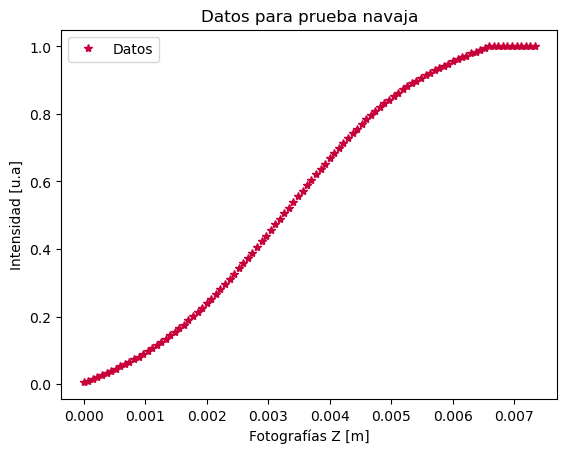

In [39]:
fig, ax = plt.subplots()
ax.plot(xx, data, marker='*', linestyle='', color='#C70039', label='Datos')

# Agregar etiquetas y título
ax.set_title('Datos para prueba navaja')
ax.set_xlabel('Fotografías Z [m]')
ax.set_ylabel('Intensidad [u.a]')
ax.legend()

# Mostrar la gráfica
plt.show()

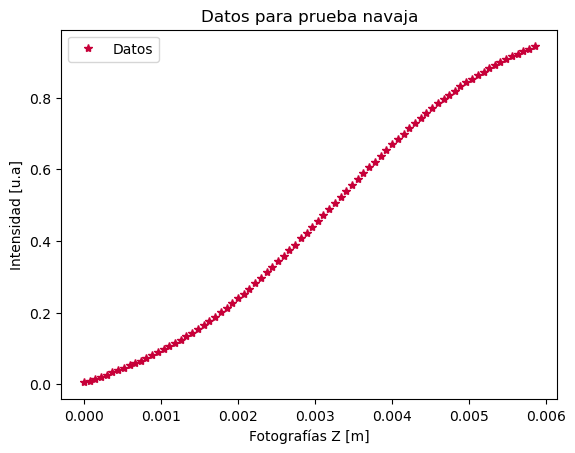

In [44]:
x = xx[0:80]
d=data[0:80]
fig, ax = plt.subplots()
ax.plot(x, d, marker='*', linestyle='', color='#C70039', label='Datos')

# Agregar etiquetas y título
ax.set_title('Datos para prueba navaja')
ax.set_xlabel('Fotografías Z [m]')
ax.set_ylabel('Intensidad [u.a]')
ax.legend()
# Mostrar la gráfic2
plt.show()

Valores ajustados:
A = 0.5337341139383629
mu = 0.003213928337732258
sigma = 0.0018880039292463494
C = 0.4963278790116349


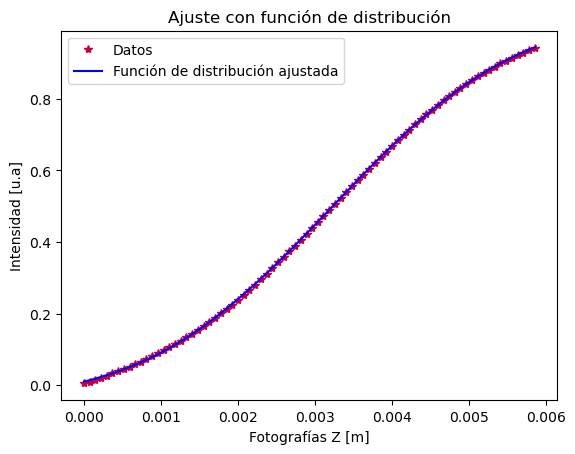

In [46]:

# Definir la función de error
def error_function(x, A, mu, sigma, C):
    return A*(erf((x - mu) / (sigma * np.sqrt(2))) )+ C

# Datos de ejemplo (usa tus datos 'data' y 'xx')
# xx es el eje X, y data es el eje Y

x = np.array(x)  # Asegúrate de reemplazar 'xx' por tus datos reales
d = np.array(d)  # Asegúrate de reemplazar 'data' por tus datos reales

# Realizar el ajuste utilizando curve_fit
popt, pcov = optimize.curve_fit(error_function, x, d, p0=[1, 0, 1, 0])

# popt contiene los parámetros ajustados: A, mu, sigma, C
A, mu, sigma, C = popt

# Imprimir los valores ajustados
print("Valores ajustados:")
print(f"A = {A}")
print(f"mu = {mu}")
print(f"sigma = {sigma}")
print(f"C = {C}")

# Crear la función ajustada con los parámetros obtenidos
fitted_d = error_function(x, *popt)

# Graficar los datos y la función ajustada
fig, ax = plt.subplots()
ax.plot(x, d, marker='*', linestyle='', color='#C70039', label='Datos')
ax.plot(x, fitted_d, color='blue', label='Función de distribución ajustada')

# Agregar etiquetas y título
ax.set_title('Ajuste con función de distribución')
ax.set_xlabel('Fotografías Z [m]')
ax.set_ylabel('Intensidad [u.a]')
ax.legend()
#plt.savefig('20250303_ajuste_cinturadehaz_780nm.png', dpi=300) 
# Mostrar la gráfica
plt.show()


El FWHM (ancho de media altura) es: 0.0044000763779847496


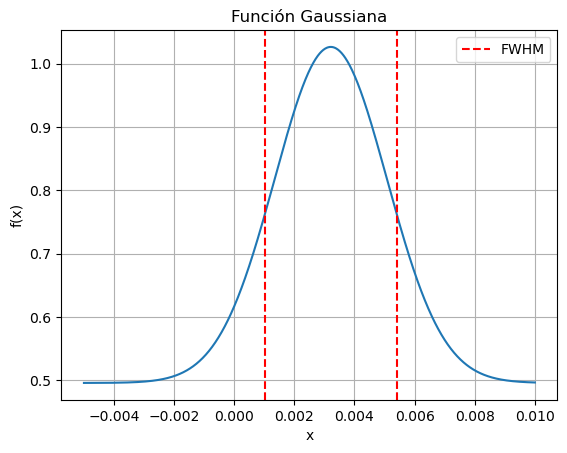

In [48]:

# Definir la función Gaussiana
def gaussian(x, A, mu, sigma, C):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2)) + C

# Parámetros de la función Gaussiana
A = 0.5305618975641037
mu = 0.003211734474891671
sigma = 0.0018685403953773968
C = 0.4960514092902803

# Calcular el FWHM
FWHM = 2 * np.sqrt(2 * np.log(2)) * sigma
print(f"El FWHM (ancho de media altura) es: {FWHM}")

# Rango de valores de x
x = np.linspace(-.005, .01, 1000)

# Calcular los valores de la función Gaussiana
y = gaussian(x, A, mu, sigma, C)

# Graficar la función
plt.plot(x, y)
plt.title('Función Gaussiana')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axvline(mu - FWHM/2, color='r', linestyle='--', label='FWHM')
plt.axvline(mu + FWHM/2, color='r', linestyle='--')
plt.legend()
plt.savefig('20250303_ajuste_cinturadehaz_780nm_gauss.png', dpi=300) 
plt.grid(True)
plt.show()


### Prueba de la navaja para 780 nm 

In [38]:

sigma780 = [0.0012735057985913427,0.0012807916961904047,0.0013031784760272843,0.0013127869548551350,0.0013536847193061359,
           0.0013822663122660323,0.0013844154307162098,0.0013742620976340272,0.0013855993422455133,0.001411615848661991,
           0.001427337501912481 ,0.0014350626970944383,0.001468660951990149 ,0.0014797816002604998,0.0014963243254360202,
           0.0014943167047040786,0.0015270437481227793,0.0015554358715051497,0.0015614115409603386,0.0015892453116651789,
           0.0016077215227569004,0.001626621324423246, 0.001652031329444404 ,0.0016766211879972281,0.0016911691641866315,
           0.001709416244137683, 0.0017361121154628614,0.0017600437075193957,0.001801189653500555, 0.0018179242881554208,
           0.0018316562927606398,0.0019244790208420486,0.0018393086020746879,0.0018800341742815224,0.001875228138704748,
           0.0019122034293354584]

Foto = [.0,.01,.02,.03,.04,.05,.06,.07,.08,.09,.1,.11,.12,.13,.14,.15,.16,.17,.18,.19,.2,.21,.22,.23,.24,.25,.26,.27,.28,.29,.3,.31,.32,.33,.34,.35 ]



In [63]:
z= []
for i in Foto:
    z.append((i)*2)
    
sigma2 =[]
for i in sigma780:
    sigma2.append(i*sqrt(2))

El valor ajustado de w es: 0.002232215282229671


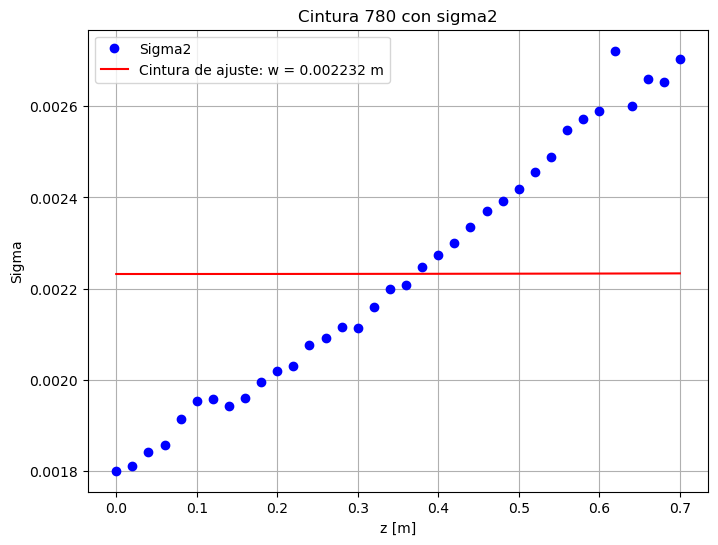

In [42]:
# Datos experimentales
y_data = np.array(sigma2)

# Valores de x proporcionados
x_data = np.array(z)

# Función para el ajuste
def model(x, w):
    return w * np.sqrt(1 + ((x * 780e-9) / (np.pi * w**2))**2)

# Ajuste de los datos a la función
params, covariance = opt.curve_fit(model, x_data, y_data, p0=[0.1])  # p0 es el valor inicial para w

# El valor estimado de w
w_fit = params[0]
print(f"El valor ajustado de w es: {w_fit}")

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.plot(x_data, y_data, 'bo', label='Sigma2')
plt.plot(x_data, model(x_data, w_fit), 'r-', label=f'Cintura de ajuste: w = {w_fit:.6f} m')
plt.title('Cintura 780 con sigma2')
plt.xlabel('z [m]')
plt.ylabel('Sigma')
plt.legend()
plt.grid(True)

my_file = '20250306_cinturadehaz_780nm.png'
plt.savefig(os.path.join(general_path_figure, my_file))
plt.show() 

### Prueba de la navaja para 420 nm


In [50]:

sigma = [0.0007486952602189078, 0.000730464822173449, 0.0007246104498644426, 0.0006629711148042462, 0.0006655722008879132, 0.0006655722008879132,
         0.0007072873419620904, 0.0007151526526470093, 0.0007210497268602303,0.0007375920816797947, 0.0007291597417682413, 0.0007221592070404426,
         0.0007238569545306884, 0.0007318568584532381, 0.000690432836139244, 0.0007414556212649314, 0.0007405415239818407, 0.0007154031212709161,
         0.0007214618982338538, 0.0007335207619842608, 0.0007563321344697074,0.0007661230183700739, 0.0007661230183700739, 0.0007786539190356817,
         0.0007441741990971422, 0.0007679172634879854, 0.0007746548493673499,0.0007872016120639416,  0.0008040614146339107, 0.0007700455543788288,
         0.0007701555425963004, 0.0007402786486659559, 0.0007421751465327234, 0.0007716423308021845, 0.0007690108924349985, 0.0007684226146655358,
         0.0007742756530578324, 0.0007820397247844148, 0.0008009174549346301, 0.0008269823114200204, 0.0008392836461047004, 0.0008052911731414456,
         0.000799995911414937]
Foto  = [0,.01,.02,.03,.04,.05,.06,.07,.08,.09,.10,.11,.12,.13,.14,.15,.16,.17,.18,.19,.20,.21,.22,.23,.24,.25,.26,.27,.28,.29,.30,.31,.32,.33,.34,.35,.36,.37,.38,.39,.40,.41,.42]


In [52]:

z= []
for i in Foto:
    z.append((i+.18)*2)
    
sigma2 =[]
for i in sigma:
    sigma2.append(i*sqrt(2))

El valor ajustado de w es: 0.0010546994288081494


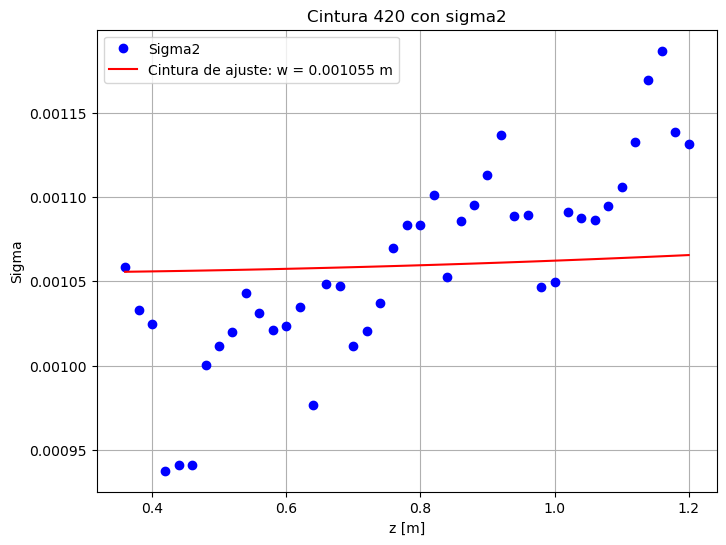

In [54]:

# Datos experimentales
y_data = np.array(sigma2)

# Valores de x proporcionados
x_data = np.array(z)

# Función para el ajuste
def model(x, w):
    return w * np.sqrt(1 + ((x * 420e-9) / (np.pi * w**2))**2)

# Ajuste de los datos a la función
params, covariance = opt.curve_fit(model, x_data, y_data, p0=[0.1])  # p0 es el valor inicial para w

# El valor estimado de w
w_fit = params[0]
print(f"El valor ajustado de w es: {w_fit}")

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.plot(x_data, y_data, 'bo', label='Sigma2')
plt.plot(x_data, model(x_data, w_fit), 'r-', label=f'Cintura de ajuste: w = {w_fit:.6f} m')
plt.title('Cintura 420 con sigma2')
plt.xlabel('z [m]')
plt.ylabel('Sigma')
plt.legend()
plt.grid(True)
my_file = '20250306_cinturadehaz_420nm.png'
plt.savefig(os.path.join(general_path_figure, my_file))
plt.show() 

### Prueba Navaja para 776

In [73]:
sigma776 = [0.0012558599502026228, 0.0012672250926906775, 0.0012801065332693523, 0.0012788924110111028, 0.001349824362058813, 0.0012810779883635926,
         0.001296030192561295,  0.0012992484911214682, 0.0013093394851594233, 0.001375697859723459 , 0.001404324676475126, 0.0013876175532368611,
         0.0013732413014804483, 0.0013683702098503227, 0.0013438995383267904, 0.001365755685806098 , 0.0012690319543492568, 0.001402385163676057,
         0.0014924987970961062, 0.001487304787641388 , 0.0015242105505718047, 0.0015733540845337135, 0.0016258593069295058, 0.0016705061180275755,
         0.0017168720516372556, 0.0016400658409807913, 0.0016905660507142576, 0.0017301268575808052, 0.0017282097918114479, 0.001668271633311221,
         0.0016876130640714779, 0.0018331054997946668, 0.0018137174256452528, 0.0018476730227583935, 0.001929565966808161, 0.001787736871287331 ]

In [75]:
fwhm = [0.0034468869215765687, 0.00344365343722154 ,  0.0035040637832791724, 0.00364713345380479 ,  0.0037575069186675863, 0.0037575069186675863, 
         0.0033901261945473845,0.0033508903092345694, 0.0033809861986152717, 0.0034227074444906115, 0.0033903959647057454, 0.003352146566903315,
       0.004199127117752056,  0.0036545086011180263  ,0.003351996012415068,  0.003473108425720457,  0.003530272678222077,  0.0035127637607322076,
        0.0035025160334331514, 0.0034970232795602024, 0.0034422636637814817, 0.0034511330236073846, 0.0034465758079744438, 0.003456308958721992,
       0.0034283282355372217,0.0034448777026557377, 0.0034441899615187833,  0.0034502522752329575, 0.0033829272064510017,  0.003635605221337907,
        0.003579586685520145]

sigma = [0.0012558599502026228, 0.0012672250926906775, 0.0012801065332693523, 0.0012788924110111028, 0.001349824362058813, 0.0012810779883635926,
         0.001296030192561295,  0.0012992484911214682, 0.0013093394851594233, 0.001375697859723459 , 0.001404324676475126, 0.0013876175532368611,
         0.0013732413014804483, 0.0013683702098503227, 0.0013438995383267904, 0.001365755685806098 , 0.0012690319543492568, 0.001402385163676057,
         0.0014924987970961062, 0.001487304787641388 , 0.0015242105505718047, 0.0015733540845337135, 0.0016258593069295058, 0.0016705061180275755,
         0.0017168720516372556, 0.0016400658409807913, 0.0016905660507142576, 0.0017301268575808052, 0.0017282097918114479, 0.001668271633311221,
         0.0016876130640714779, 0.0018331054997946668, 0.0018137174256452528, 0.0018476730227583935, 0.001929565966808161, 0.001787736871287331 ]

Foto = [.0, .01, 0.2,.03,.04,.05,.06,.07,.08,.09,.1,.11,.12,.13,.14,.15,.16,.17,.18,.19,.2,.21,.22,.23,.24,.25,.26,.27,.28,.29,.3,.31,.32,.33,.34,.35]


In [77]:
z= []
for i in Foto:
    z.append((i)*2)
    
sigma2 =[]
for i in sigma:
    sigma2.append(i*sqrt(2))
len(sigma2)

36

El valor ajustado de w es: 0.0021345634884984994


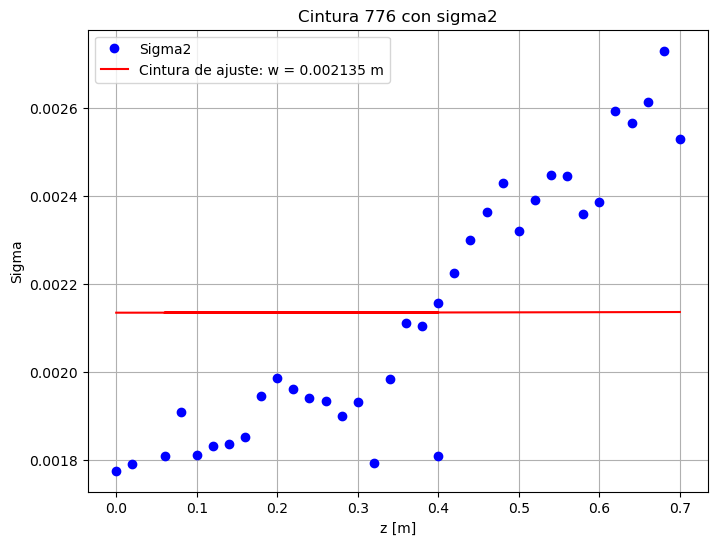

In [79]:
# Datos experimentales
y_data = np.array(sigma2)

# Valores de x proporcionados
x_data = np.array(z)

# Función para el ajuste
def model(x, w):
    return w * np.sqrt(1 + ((x * 776e-9) / (np.pi * w**2))**2)

# Ajuste de los datos a la función
params, covariance = opt.curve_fit(model, x_data, y_data, p0=[0.1])  # p0 es el valor inicial para w

# El valor estimado de w
w_fit = params[0]
print(f"El valor ajustado de w es: {w_fit}")

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.plot(x_data, y_data, 'bo', label='Sigma2')
plt.plot(x_data, model(x_data, w_fit), 'r-', label=f'Cintura de ajuste: w = {w_fit:.6f} m')
plt.title('Cintura 776 con sigma2')
plt.xlabel('z [m]')
plt.ylabel('Sigma')
plt.legend()
plt.grid(True)
my_file = '20250306_cinturadehaz_776nm.png'
plt.savefig(os.path.join(general_path_figure, my_file))
plt.show() 

TypeError: Length of x (1000) must match number of columns in z (1280)

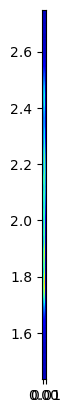

In [53]:
fig, ax = plt.subplots(1, 1)
#ax.hold(True) For older versions. This has now been deprecated and later removed
ax.imshow(prueba30, cmap=plt.cm.jet, origin='lower',
    extent=(x.min(), x.max(), y.min(), y.max()))
ax.contour(x, y, data_fitted, 8, colors='w')
plt.show()

In [ ]:
# use your favorite image processing library to load an image
FWHMx776 = []
FWHMy776 = []
   
for file in Gauss_776:
    im = cv2.imread(file)
    im = np.array((im),dtype=int)[:,:,0]
    h, w = im.shape
    data = im.ravel()
    x = np.linspace(0, w, w)
    y = np.linspace(0, h, h)
    x, y = np.meshgrid(x, y)
     # initial guess of parameters: amplitude, xo, yo, sigma_x, sigma_y, theta, offset
    initial_guess = (100, 800, 500, 300, 300)
        
    # find the optimal Gaussian parameters
    popt, pcov = curve_fit(Gaussian_2d, (x, y), data, p0=initial_guess) 
    FWx = (np.abs(popt[3]))*5.2e-6
    FWy = (np.abs(popt[4]))*5.2e-6
    FWHMx776.append(FWx)
    FWHMy776.append(FWy)
    

In [34]:
size(FWHMx776)

36

In [35]:
#FWHMx776
d = [0,30,60,90,120,150,180,210,240,270,300,330,360,390,420,450,480,510,590,620,650,680,710,740,770,800,830,860\
     ,890,920,950,980,1010,1040,1070,1010]
#d = np.arange(0,1000,20)
myInt = 1000
d2= [i/myInt for i in d]

In [36]:
size(d2)

36

In [37]:
def waist(z,z0,lam,w0):    
    wz= w0*np.sqrt((1+((lam*(z+z0))/(np.pi*w0**2))**2))
    return wz

In [38]:
'''result = fit_model.fit(g2, x=hist_x, params=p, weights= 1 / g2_err)
#print(result.fit_report())
#result.plot()
plt.figure()
plt.errorbar(hist_x, (hist/1) , yerr=(hist_err/1)  , fmt='-',color='r')
plt.xlabel('$\Delta$t (ns)')
plt.ylabel('g$^{(2)}$(t) (ns)')
result = fit_model.fit(g2, x=hist_x, params=p, weights= 1 / g2_err,color='r')
print(result.fit_report())
result.plot()
plt.xlabel('$\Delta$t (ns)',fontsize=15)
plt.ylabel('g$^{(2)}$(t) (ns)',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)'''

"result = fit_model.fit(g2, x=hist_x, params=p, weights= 1 / g2_err)\n#print(result.fit_report())\n#result.plot()\nplt.figure()\nplt.errorbar(hist_x, (hist/1) , yerr=(hist_err/1)  , fmt='-',color='r')\nplt.xlabel('$\\Delta$t (ns)')\nplt.ylabel('g$^{(2)}$(t) (ns)')\nresult = fit_model.fit(g2, x=hist_x, params=p, weights= 1 / g2_err,color='r')\nprint(result.fit_report())\nresult.plot()\nplt.xlabel('$\\Delta$t (ns)',fontsize=15)\nplt.ylabel('g$^{(2)}$(t) (ns)',fontsize=15)\nplt.xticks(fontsize=12)\nplt.yticks(fontsize=12)"

[[Model]]
    Model(waist)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 36
    # variables        = 2
    chi-square         = 1.2149e-08
    reduced chi-square = 3.5734e-10
    Akaike info crit   = -781.141936
    Bayesian info crit = -777.974898
    R-squared          = 0.96143814
[[Variables]]
    lam:  7.76e-07 (fixed)
    z0:   4.88612127 +/- 0.11791486 (2.41%) (init = 5)
    w0:   8.0113e-04 +/- 2.2410e-05 (2.80%) (init = 0.001)
[[Correlations]] (unreported correlations are < 0.100)
    C(z0, w0) = +0.9954


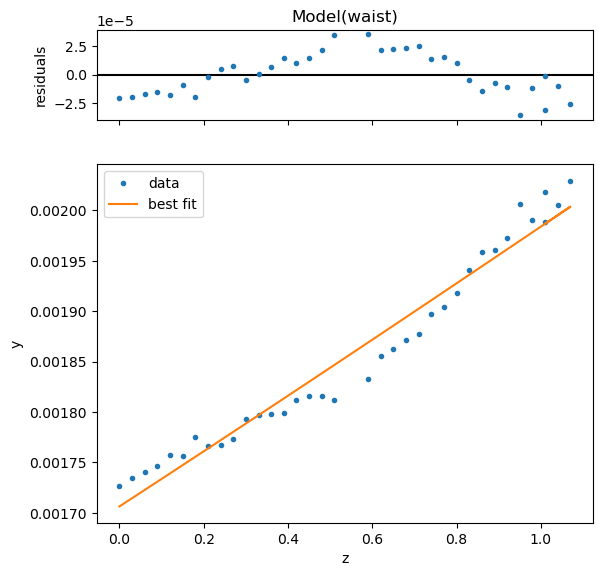

In [39]:
gmodel = Model(waist)

# initializes the fit parameters
p = Parameters()
p.add('lam', 776e-9, vary=False)
p.add('z0', 5)
p.add('w0',1e-3)


result = gmodel.fit(FWHMy776, z=d2, params=p)
#residuals_y = ydata - result.best_fit
#residuals_x = xdata - result.best_fit
print(result.fit_report())

result.plot('.')
#plt.plot(X, xdata, '.')
#plt.plot(X, result.init_fit, '--', label='initial fit')
#plt.plot(X, result.best_fit, '-', label='best fit')
plt.legend()
#plt.show()

In [194]:
l_776 = 776e-9
w0_776 = result.params['w0'].value
FWHM776 = 2.25482*w0_776    #resultado en m
z0 = (np.pi*w0_776**2)/l_776
z0
#FWHM776y = 2.25482 * FWHM776y

2.5983222229105656

In [196]:
# use your favorite image processing library to load an image
FWHMx780 = []
FWHMy780 = []
   
for file in Gauss_780:
    im = cv2.imread(file)
    im = np.array((im),dtype=int)[:,:,0]
    h, w = im.shape
    data = im.ravel()
    x = np.linspace(0, w, w)
    y = np.linspace(0, h, h)
    x, y = np.meshgrid(x, y)
     # initial guess of parameters: amplitude, xo, yo, sigma_x, sigma_y, theta, offset
    initial_guess = (100, 800, 500, 300, 300)
        
    # find the optimal Gaussian parameters
    popt, pcov = curve_fit(Gaussian_2d, (x, y), data, p0=initial_guess) 
    FWx = (np.abs(popt[3]))*5.2e-6
    FWy = (np.abs(popt[4]))*5.2e-6
    FWHMx780.append(FWx)
    FWHMy780.append(FWy)
    

[[Model]]
    Model(waist)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 36
    # variables        = 2
    chi-square         = 9.6769e-09
    reduced chi-square = 2.8461e-10
    Akaike info crit   = -789.333599
    Bayesian info crit = -786.166561
    R-squared          = 0.99074349
[[Variables]]
    lam:  7.8e-07 (fixed)
    z0:   3.53321814 +/- 0.06170587 (1.75%) (init = 5)
    w0:   4.7134e-04 +/- 7.4554e-06 (1.58%) (init = 0.0006)
[[Correlations]] (unreported correlations are < 0.100)
    C(z0, w0) = +0.9961


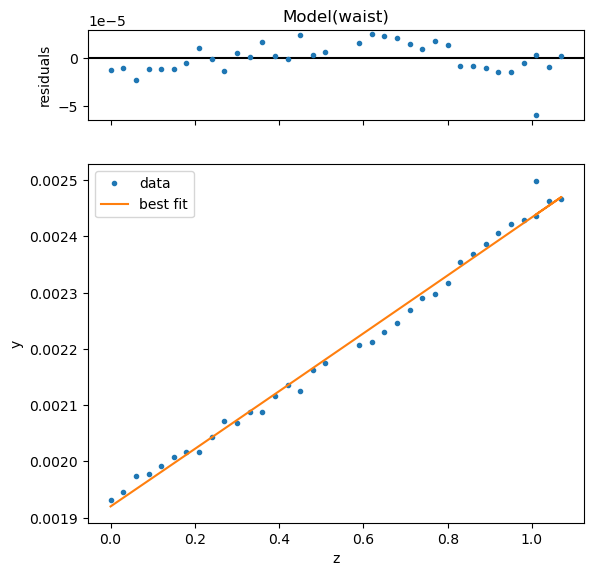

In [197]:
gmodel = Model(waist)

# initializes the fit parameters
p = Parameters()
p.add('lam', 780e-9, vary=False)
p.add('z0', 5)
p.add('w0',6e-4)


result = gmodel.fit(FWHMy780, z=d2, params=p)
print(result.fit_report())

result.plot('.')
#plt.plot(X, xdata, '.')
#plt.plot(X, result.init_fit, '--', label='initial fit')
#plt.plot(X, result.best_fit, '-', label='best fit')
plt.legend()
#plt.show()

In [198]:
landa = 780e-9
w0_780 = result.params['w0'].value
FWHM780 = 2.25482*w0_780    #resultado en m
z0_780 = (np.pi*w0_780**2)/landa 
z0_780

0.8948047575946461

In [199]:
result.params['w0'].value

0.00047134239829066903

In [200]:
d420=[180,200,220,240,260,280,300,320,340,360,380,400,420,440,460,480,640,660,680,700,\
      720,740,760,780,800,820,840,860,880,900,920,940,960,980,1000,1020,1040,1060,1080,1100]
     #,1120,1140,1160,1180,1200,1220,1240,1260,1280,1300,1320,1340,1360,1380]
d2_420= [i/myInt for i in d420]

In [201]:
#size(d420)

In [202]:
#Gauss_420.shape

In [203]:
# use your favorite image processing library to load an image
FWHMx420 = []
FWHMy420 = []
   
for file in Gauss_420[0:40]:
    im = cv2.imread(file)
    im = np.array((im),dtype=int)[:,:,0]
    h, w = im.shape
    data = im.ravel()
    x = np.linspace(0, w, w)
    y = np.linspace(0, h, h)
    x, y = np.meshgrid(x, y)
    
     # initial guess of parameters: amplitude, xo, yo, sigma_x, sigma_y, theta, offset
    initial_guess = (100, 800, 500, 300, 300)
        
    # find the optimal Gaussian parameters
    popt, pcov = curve_fit(Gaussian_2d, (x, y), data, p0=initial_guess) 
    FWx = (np.abs(popt[3]))*5.2e-6
    FWy = (np.abs(popt[4]))*5.2e-6
    FWHMx420.append(FWx)
    FWHMy420.append(FWy)
    

In [ ]:
#for file in Gauss_420[0:40]:
#    print(file)

[[Model]]
    Model(waist)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 40
    # variables        = 2
    chi-square         = 1.7443e-08
    reduced chi-square = 4.5903e-10
    Akaike info crit   = -858.128033
    Bayesian info crit = -854.750274
    R-squared          = 0.89849821
[[Variables]]
    lam:  4.2e-07 (fixed)
    z0:   2.22445608 +/- 0.05884020 (2.65%) (init = 5)
    w0:   5.1426e-04 +/- 1.9003e-05 (3.70%) (init = 0.0006)
[[Correlations]] (unreported correlations are < 0.100)
    C(z0, w0) = +0.9630


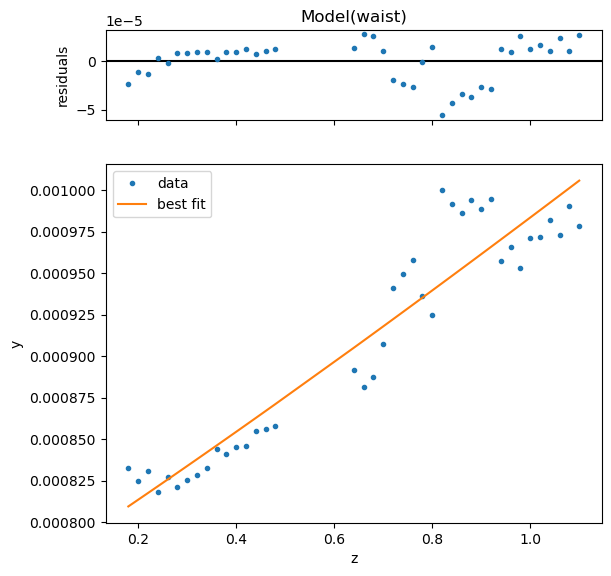

In [214]:
gmodel = Model(waist)

# initializes the fit parameters
p = Parameters()
p.add('lam', 420e-9, vary=False)
p.add('z0', 5)
p.add('w0',6e-4)


result = gmodel.fit(FWHMy420, z=d2_420, params=p)
print(result.fit_report())

result.plot('.')
#plt.plot(X, xdata, '.')
#plt.plot(X, result.init_fit, '--', label='initial fit')
#plt.plot(X, result.best_fit, '-', label='best fit')
plt.legend()
#plt.show()

In [216]:
landa = 420e-9
w0_420 = result.params['w0'].value
FWHM420 = 2.25482*w0_420    #resultado en m
z0_420 = (np.pi*w0_420**2)/landa 
z0_420

1.978204319302169

In [218]:
# use your favorite image processing library to load an image 
#169.58099018 712.69217621 511.9645285  160.63058999 158.62486087
FWHMx420_2 = []
FWHMy420_2 = []
   
for file in Gauss_420_2[0:45]:
    im = cv2.imread(file)
    im = np.array((im),dtype=int)[:,:,0]
    h, w = im.shape
    data = im.ravel()
    x = np.linspace(0, w, w)
    y = np.linspace(0, h, h)
    x, y = np.meshgrid(x, y)
    
     # initial guess of parameters: amplitude, xo, yo, sigma_x, sigma_y, theta, offset
    initial_guess = (170, 700, 500, 160, 150)
        
    # find the optimal Gaussian parameters
    popt, pcov = curve_fit(Gaussian_2d, (x, y), data, p0=initial_guess) 
    FWx = (np.abs(popt[3]))*5.2e-6
    FWy = (np.abs(popt[4]))*5.2e-6
    FWHMx420_2.append(FWx)
    FWHMy420_2.append(FWy)    

In [229]:
size(FWHMx420_2)

43

In [237]:
d420_2 = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,380,400,420,440,460,480,500, 520,540,560,580,600,\
          620,640,660,680,700,\
      720,740,760,780,800,820,840,860,880]
     #,1120,1140,1160,1180,1200,1220,1240,1260,1280,1300,1320,1340,1360,1380]
d2_420_2 = [i/myInt for i in d420_2]

In [239]:
size(d420_2)

43

[[Model]]
    Model(waist)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 24
    # data points      = 43
    # variables        = 2
    chi-square         = 1.5877e-07
    reduced chi-square = 3.8726e-09
    Akaike info crit   = -830.930088
    Bayesian info crit = -827.407687
    R-squared          = 0.74415744
[[Variables]]
    lam:  4.2e-07 (fixed)
    z0:   1.76772543 +/- 0.16028601 (9.07%) (init = 5)
    w0:   3.2160e-04 +/- 2.6192e-05 (8.14%) (init = 0.0006)
[[Correlations]] (unreported correlations are < 0.100)
    C(z0, w0) = +0.9885


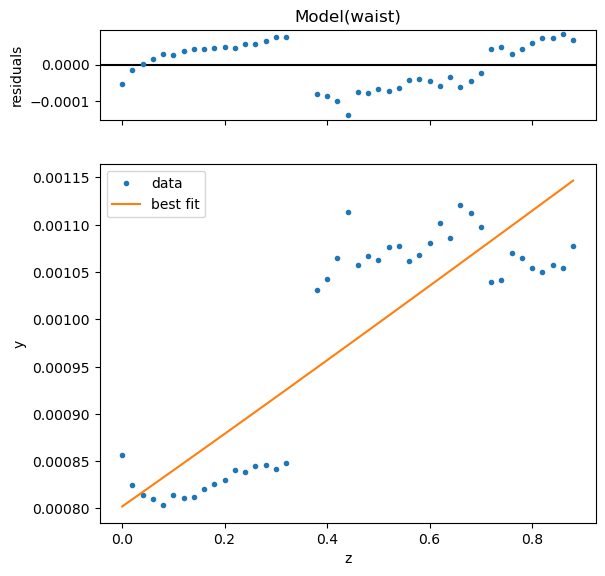

In [241]:
gmodel = Model(waist)

# initializes the fit parameters
p = Parameters()
p.add('lam', 420e-9, vary=False)
p.add('z0', 5)
p.add('w0',6e-4)


result = gmodel.fit(FWHMy420_2, z=d2_420_2, params=p)
print(result.fit_report())

result.plot('.')
#plt.plot(X, xdata, '.')
#plt.plot(X, result.init_fit, '--', label='initial fit')
#plt.plot(X, result.best_fit, '-', label='best fit')
plt.legend()
#plt.show()

In [ ]:
#plt.imshow(data_fitted)  #tamaño:  (150,150)
#plt.show()

In [ ]:
#Primero se construye un arreglo con las ubicaciones/rutas de las fotos

#d = 10

#Modo en el que se define el tamaño de una matriz
#matriz = [[0 for x in range(numero_columnas)] for y in range(numero__renglones)]
#UbicacionFoto = [[0 for x in range(6)] for y in range(d)] 
'''
# Ruta para fotos de 2 y 4 vortices con una separacion de 40 px
UF_sep40_2vortices420 = np.array(list(sorted(Path(ruta7).glob('20241015-2vortices-p78015-p77614-sep40mu-*.png'))))
UF_sep40_2vortices776 = np.array(list(sorted(Path(ruta6).glob('20241015-p776-14-sepX-40mu-d-*.png'))))
UF_sep40_4vortices420 = np.array(list(sorted(Path(ruta12).glob('4vortices-sep40px-azul-p780-13mW7-p776-13mW-det40MHz-d*.jpg'))))
UF_sep40_4vortices776 = np.array(list(sorted(Path(ruta12).glob('4vortices776/4vortices-sep40px-d*.jpg'))))

# Ruta para fotos de 2 y 4 vortices con una separacion de 50 px
UF_sep50_2vortices420 = np.array(list(sorted(Path(ruta12).glob('2vortices-vs-distancia/2vortices-sep50px-azul-p780-13mW-p776-13mW-det40MHz-d*.jpg'))))
UF_sep50_2vortices776 = np.array(list(sorted(Path(ruta12).glob('2vortices-vs-distancia/2vortices-776/2vortices-sep50px-776-d*.jpg'))))
UF_sep50_4vortices420 = np.array(list(sorted(Path(ruta12).glob('4vortices-sep40px-azul-p780-13mW7-p776-13mW-det40MHz-d*.jpg'))))
UF_sep50_4vortices776 = np.array(list(sorted(Path(ruta12).glob('4vortices776/4vortices-sep40px-d*.jpg'))))

# Ruta para fotos de 2 y 4 vortices con una separacion de 30 px
UF_sep30_2vortices420 = np.array(list(sorted(Path(ruta10).glob('2vortices-azul/20241128-2vortices-30px-780-12mW776-12-d*.jpg'))))
UF_sep30_2vortices776 = np.array(list(sorted(Path(ruta10).glob('20241128-2vortices-30px-780-12mW776-12-d*.jpg'))))
UF_sep30_4vortices420 = np.array(list(sorted(Path(ruta8).glob('20241114_p780-12_p776-12_det-42_T-86_sep30px_d*.jpg'))))
UF_sep30_4vortices776 = np.array(list(sorted(Path(ruta9).glob('20241114_p780-12_p776-12_det-42_T-86_sep30px_d*.jpg'))))

UF_sep30_5vortices420 = np.array(list(sorted(Path(ruta8).glob('20241114_5vortices_p780-12_p776-12_det-42_T-86_sep30px_d*.jpg'))))
UF_sep30_5vortices776 = np.array(list(sorted(Path(ruta9).glob('5vortices/20241114_p780-12_p776-12_det-42_T-86_sep30px_d*.jpg'))))

UF_sep20_2vortices420 = np.array(list(sorted(Path(ruta11).glob('420-2vortices-sep20px/20241108-T86-p780-14mW-p776-12mW-del-42-sep20mu-d*.jpg'))))
UF_sep20_2vortices776 = np.array(list(sorted(Path(ruta11).glob('776-2vortices-sep20px/20241108-2vortices-sep20px-776-d*.jpg'))))

                                 
UF_sep50_2vortices776.shape'''

In [ ]:
def removeBlack(img,offset=0):
    imsize = np.shape(img)
    if len(np.shape(img)) == 1:
        for i in range(imsize[0]):
            if img[i] < offset:
                img[i] = 0
    else:
        for i in range(imsize[1]):
            for j in range(imsize[0]):
                if img[j,i] < offset:
                    img[j,i] = 0
    return img

In [ ]:
#prueba0 = mpimg.imread(UbicacionFoto[0]) 
prueba0 = mpimg.imread(UF_sep40_2vortices776[4]) 
prueba0 = np.array((prueba0*255)[400:600,540:760],dtype=int)[:,:,0]
plt.imshow(prueba0, cmap = 'hot')  #tamaño:  (150,150)
plt.show()
prueba0

In [ ]:
from PIL import Image
from PIL import Image
import PIL.ImageOps 

In [ ]:
# read image and convert it to grayscale and RGB 
image = cv2.imread(UF_sep40_2vortices776[10],cv2.IMREAD_GRAYSCALE)
#gray_image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#rgb_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


gray = cv2.GaussianBlur(image,(21,21), 0)
print(gray.shape)
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)

#    cv2.imshow("spot", gray)
#    rval, frame = cam.read()
#    key = cv2.waitKey(20)
cv2.circle(image, minLoc, 40, (255, 0, 0) )
cv2.imshow("spot",image)
# create binary image
#ret, binary_image= cv2.threshold(gray_image, 75, 255, 0)

# Convert the image to grayscale
#gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define a threshold for dark regions (0-255)
#threshold_value = 50  # You can adjust this threshold value based on your image

# Apply a binary threshold to identify dark regions
#_, dark_areas = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY_INV)

# Optionally, find contours of the dark areas
#contours, _ = cv2.findContours(dark_areas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
#cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

# Show the image with dark areas highlighted
#cv2.imshow('Dark Areas', image)
#key = cv2.waitKey(20)
cv2.destroyWindow("spot")
#cv2.waitKey(1)

In [ ]:
prueba=removeBlack(prueba0,0)

In [ ]:
#img = Image.open("archive.extension") 
img = Image.open(UF_sep40_2vortices776[4])

pixels = img.load()

for i in range(img.size[0]):
    for j in range(img.size[1]):
        x,y,z = pixels[i,j][0],pixels[i,j][1],pixels[i,j][2]
        x,y,z = abs(x-255), abs(y-255), abs(z-255)
        pixels[i,j] = (x,y,z)

#img.show()
plt.imshow(img, cmap = 'hot')  #tamaño:  (150,150)
plt.show()
#plt.show()

In [ ]:
#PIL.ImageChops.invert(PIL.Image.open(UF_sep20_2vortices776[4]))

In [ ]:
global choise, offset, vis
choice = 'fw1e2'
offset = 0
vis = True

In [ ]:
global limits,saturationlim,pixels
limits = [0,6.66,0,5.32]
saturationlim = 255
pixels = [1280,1024]

In [ ]:
def gaus(x,a,mu,sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

In [ ]:
x = np.linspace(0,limits[1],pixels[0])
y = np.linspace(0,limits[3],pixels[1])
v =x,y

In [ ]:
def gauss2D(v, c, a, x0, y0, sx, sy):
    """ A 2D version of the gaussian bell function.

    Parameters
    ----------
    v: tuple of two array
        x and y coordinates
    c: float
        Offset
    a: float
        Amplitute
    x0: float
        Center in x.
    y0: float
        Center in y.
    sx : float
        Standard deviation in x.
    sy : float
        Standard deviation in y.
    Returns
    -------
    array
        Function values.  
    """
   
    #x, y = v
    argx = -(x - x0)**2 / (2 * sx**2)
    argy = -(y - y0)**2 / (2 * sy**2)
    return c + a*np.exp(argx+argy)

In [ ]:
im = Image.open(UF_sep40_2vortices776[8])
im = im.convert('L')
im = PIL.ImageOps.invert(im)
im = im.convert('1')
plt.imshow(im)  #tamaño:  (150,150)
plt.show()

In [ ]:
type(im)

In [ ]:
shape = np.array(im).shape
shape

In [ ]:
prueba0 = np.array((im) ,dtype=int)
prueba0

In [ ]:
img = cv2.imread(UF_sep50_2vortices776[9])
image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
    #find contours

#contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#draw these contours
#thresh=cv2.threshold(image, 140, 255, cv2.THRESH_BINARY )[1] # threshold level is ~10
#x, y, w, h = cv2.boundingRect(thresh)
#crop = img[y:y+h, x:x+w]
#imshow(crop)
#gray = cv2.filter2D(image,(21,21), 1)
gray = cv2.GaussianBlur(image,(21,21), 0)
imshow(gray[450:700,400:700])

In [ ]:
img = cv2.imread(UF_sep50_2vortices776[7])
image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  

image = cv2.GaussianBlur(image,(21,21), 0)

    #find contours
contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #draw these contours
thresh=cv2.threshold(image, 100, 255, cv2.THRESH_BINARY )[1] # threshold level is ~10
x, y, w, h = cv2.boundingRect(thresh)
crop = img[y:y+h, x:x+w]
imshow(crop)
#gray = cv2.GaussianBlur(crop,(21,21), 0)
#print(gray.shape)
#(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)

#    cv2.imshow("spot", gray)
#    rval, frame = cam.read()
#    key = cv2.waitKey(20)
#cv2.circle(crop, minLoc, 40, (255, 0, 0) )
#cv2.imshow("spot",crop)

#key = cv2.waitKey(20)
#cv2.destroyWindow("spot")

In [ ]:
#prueba0 = mpimg.imread(UbicacionFoto[0]) 
prueba0 = mpimg.imread(UF_sep50_2vortices776[5]) 
prueba0 = np.array((prueba0),dtype=int)[:,:,0]
#[579:600,400:550]
plt.imshow(prueba0, cmap = 'hot')  #tamaño:  (150,150)
plt.show()
prueba0


In [ ]:
#center_y_50px_776

y=[578,578,570,569,565, 557,552,554,551,545,543,541,538,535,535,532,530,520,520,518,520,520]

In [ ]:
from matplotlib.patches import Circle, Rectangle
from skimage import transform
from skimage.color import rgb2gray
from skimage.feature import match_template
from skimage.feature import peak_local_max
import skimage

In [ ]:
im = cv2.imread(UF_sep40_2vortices776[12], cv2.IMREAD_GRAYSCALE)
# create the detector with default parameters.
detector = cv2.SimpleBlobDetector_create()
 
# Detect dots.
keypoints = detector.detect(im)

print("Black Dots Count is:",len(keypoints))

# Draw detected blobs as red circles.
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,250), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow("Output image:", im_with_keypoints)

cv2.destroyAllWindows()

In [ ]:
from skimage.draw import circle_perimeter
#(M,N) = img.shape
mm =200
nn = 200
template = np.zeros([mm,nn])

## Create template ##

#darkest inner circle (pupil)
(rr,cc) = circle_perimeter(100,100,10)
template[rr,cc]=-1

#iris (circle surrounding pupil)
#(rr,cc) = circle_perimeter(120,120,10)
#template[rr,cc] = -1

#Optional - pupil reflective spot (if centered)
#(rr,cc) = circle_perimeter(100,100,4)
#template[rr,cc] = 1

plt.imshow(template)

In [ ]:
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(image)

## Análisis para fotos con 2 vórtices y separación de 40 px en azul

In [ ]:
# Definimos nuestro patrón que vamos a utilizar para comparar con la foto original, vamos a utilizar una imagen 
img = cv2.imread(UF_sep40_2vortices420[15])
#image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
img = cv2.GaussianBlur(img,(21,21), 0)
img = np.mean(img, axis=2)
template = img[500:560,760:810]
plt.imshow(template)

In [ ]:
img = cv2.imread(UF_sep40_2vortices420[14])
img = np.mean(img, axis=2)

resulting_image = match_template(img, template)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(resulting_image, cmap='magma');

In [ ]:
x, y = np.unravel_index(np.argmax(resulting_image), resulting_image.shape)
template_width, template_height = template.shape
rect = plt.Rectangle((y, x), template_height, template_width, 
                     color='r', fc='none')
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.gca().add_patch(rect)
imshow(img);

In [ ]:
template_width, template_height = template.shape    
plt.figure(num=None, figsize=(8, 6), dpi=80)
for x, y in peak_local_max(resulting_image, threshold_abs=0.70, 
                           exclude_border = 20):
    rect = plt.Rectangle((y, x), template_height, template_width,
                          color='r', fc='none')
    plt.gca().add_patch(rect)
    print(x,y)
imshow(img);

In [ ]:
F1_2v = [(495,533),(514,582)]
F2_2v = [(493,555),(519,603)]
F3_2v = [(491,592),(523,644)]
F4_2v = [(491,614),(527,666)]
F5_2v = [(490,626),(527,682)]  #foto5
F6_2v = [(491,642),(529,697)]
F7_2v = [(494,657),(529,717)]
F8_2v = [(493,671),(531,729)]
F9_2v = [(495,688),(530,748)]
F10_2v = [(496,706),(531,766)]
F11_2v = [(495,720),(533,787)]
F12_2v = [(499,732),(535,801)]
F13_2v = [(499,756),(536,825)]
F14_2v = [(500,828),(536,898)]
F15_2v = [(500,760),(539,832)]
F16_2v =[(506,772),(542,845)]

In [ ]:
F_2V =[F1_2v,F2_2v,F3_2v,F4_2v,F5_2v,F6_2v,F7_2v,F8_2v,F9_2v,F10_2v,F11_2v,F12_2v,F13_2v,F14_2v,F15_2v,F16_2v]

In [ ]:
limits = [0,6.66,0,5.32]
saturationlim = 255
pixels = [1280,1024]

In [ ]:
6.66/pixels[0],5.32/pixels[1]

In [ ]:
c401x=[]
c402x=[]
c402xT=[]
c401y=[]
c402y=[]
c402yT=[]

for i in F_2V:
    c401x.append(i[0][0])
    c402x.append(i[1][0]) 
    difx=(np.abs(i[0][0]-i[1][0])/2)*5.2
    c402xT.append(difx)
    c401y.append(i[0][1])
    c402y.append(i[1][1])
    dify=(np.abs(i[0][1]-i[1][1])/2)*5.2
    c402yT.append(dify)   

In [ ]:
#plt.plot(c402xT,'*')

In [ ]:
plt.plot(c402xT,c402yT,'*')
plt.xlabel("X[$\mu m$]")
plt.ylabel("Y[$\mu m$]")

In [ ]:
#plt.plot(c402yT, '*')

In [ ]:
plt.figure("foto vs cuentas ")
plt.figure(figsize=(8,6))
plt.plot(c401y,'*')
plt.plot(c402y,'*')

In [ ]:
plt.figure("foto vs cuentas ")
plt.figure(figsize=(8,6))
plt.plot(c401x,'*')
plt.plot(c402x,'*')

## Análisis para fotos con 2 vórtices y separación de 40 px en rojo

In [ ]:
img = cv2.imread(UF_sep40_2vortices776[0])
#image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
#img = cv2.GaussianBlur(img,(21,21), 0)
img = np.mean(img, axis=2)
template = img[490:510,631:690]
plt.imshow(template)

In [ ]:
sep2v40px = 50*5.2    #Separación en micras 260 micras

In [ ]:
img2 = cv2.imread(UF_sep40_2vortices776[12])
#image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
img2 = cv2.GaussianBlur(img2,(21,21), 0)
img2 = np.mean(img2, axis=2)
template2_776 = img2[440:520,560:620]
plt.imshow(template2_776)

In [ ]:
img = cv2.imread(UF_sep40_2vortices776[21])
img = np.mean(img, axis=2)

resulting_image = match_template(img, template2)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(resulting_image, cmap='magma');

In [ ]:
x, y = np.unravel_index(np.argmax(resulting_image), resulting_image.shape)
template_width, template_height = template2.shape
rect = plt.Rectangle((y, x), template_height, template_width, 
                     color='r', fc='none')
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.gca()





.add_patch(rect)
imshow(img);

In [ ]:
template_width, template_height = template2.shape    
plt.figure(num=None, figsize=(8, 6), dpi=80)
for x, y in peak_local_max(resulting_image, threshold_abs=0.63, 
                           exclude_border = 20):
    rect = plt.Rectangle((y, x), template_height, template_width,
                          color='r', fc='none')
    plt.gca().add_patch(rect)
    print(x,y)
imshow(img);

In [ ]:
F2 = [(464,588),(466,641)]
F3 = [(455,584),(464,641)]
F4 = [(451,580),(463,640)]
F5 = [(449,575),(465,634)]
F6 = [(446,573),(468,628)]
F7 = [(444,570),(470,625)]
F8 = [(441,567),(470,625)]
F9 = [(439,570),(471,629)]
F10 = [(437,568),(473,629)]
F11 = [(435,563),(472,626)]
F12 = [(435,560),(473,627)]
F13 = [(435,558),(476,627)]
F14 = [(434,555),(475,627)]
F15 = [(431,561),(475,636)]
F16 = [(429,565),(473,640)]
F17 = [(423,576),(464,655)]
F18 = [(426,565),(469,642)]
F19 = [(424,576),(471,655)]
F20 = [(424,577),(467,657)]
#F21 = [(464 641),()]
#F22 = [(464 641),()]
#F23 = [(464 641),()]
#F24 = [(464 641),()]

In [ ]:
F=[F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20]

In [ ]:
c40_776_1x=[]
c40_776_2x=[]
c40_776_2xT=[]
c40_776_1y=[]
c40_776_2y=[]
c40_776_2yT=[]

for i in F:
    c40_776_1x.append(i[0][0])
    c40_776_2x.append(i[1][0]) 
    difx =(np.abs(i[0][0]-i[1][0])/2)
    c40_776_2xT.append(difx)
    c40_776_1y.append(i[0][1])
    c40_776_2y.append(i[1][1])
    dify=(np.abs(i[0][1]-i[1][1])/2)
    c40_776_2yT.append(dify)

In [ ]:
plt.plot(c40_776_2xT,c40_776_2yT,'*')
plt.xlabel("X[$\mu m$]")
plt.ylabel("Y[$\mu m$]")

In [ ]:
plt.figure("foto vs cuentas ")
plt.figure(figsize=(8,6))
plt.plot(c40_776_1y,'*')
plt.plot(c40_776_2y,'*')

In [ ]:
plt.figure("foto vs cuentas ")
plt.figure(figsize=(8,6))
plt.plot(c40_776_1x,'*')
plt.plot(c40_776_2x,'*')

In [ ]:
plt.figure("foto vs cuentas ")
plt.figure(figsize=(8,6))
plt.plot(c401y,'*')
plt.plot(c402y,'*')


In [ ]:
center_y_40px_420 = []
center_x_40px_420 = []
#files = sorted(glob.glob (np.array(list(sorted(Path(ruta6).glob('20241015-p776-14-sepX-40mu-d-*.png'))))))
template_width, template_height = template2.shape  
for file in  UF_sep40_2vortices420: 
    img = cv2.imread(file)
    img = np.mean(img, axis=2)  
    resulting_image = match_template(img, template2)
    for x, y in peak_local_max(resulting_image, threshold_abs=0.75, 
                               exclude_border = 20):
        rect = plt.Rectangle((y, x), template_height, template_width,
                              color='r', fc='none')
        center_y_40px_420.append(y)
        center_x_40px_420.append(x)        

In [ ]:
#plt.plot(center_y_40px_420, '*')

In [ ]:
#plt.plot(center_x_40px_420, '*')

In [ ]:
center_y_40px_420_2 = []
center_x_40px_420_2 = []
#files = sorted(glob.glob (np.array(list(sorted(Path(ruta6).glob('20241015-p776-14-sepX-40mu-d-*.png'))))))
template_width, template_height = template.shape  
for file in  UF_sep40_2vortices420: 
    img = cv2.imread(file)
    img = np.mean(img, axis=2)  
    resulting_image = match_template(img, template)
    #plt.figure(num=None, figsize=(8, 6), dpi=80)
    for x, y in peak_local_max(resulting_image, threshold_abs=0.70, 
                               exclude_border = 20):
        rect = plt.Rectangle((y, x), template_height, template_width,
                              color='r', fc='none')
        center_y_40px_420_2.append(y)
        center_x_40px_420_2.append (x)
        #plt.gca().add_patch(rect)
        #print(x,y)

In [ ]:
#plt.plot(center_y_40px_420_2, '*')

In [ ]:
#plt.plot(center_x_40px_420_2, '*')

# 4 vortices de 420 con 40px de separación


In [ ]:
img2 = cv2.imread(UF_sep40_4vortices420[15])
#image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
img2 = cv2.GaussianBlur(img2,(21,21), 0)
img2 = np.mean(img2, axis=2)
template2 = img2[470:530,680:724]
plt.imshow(template2)

In [ ]:
img = cv2.imread(UF_sep50_4vortices420[16])
img = np.mean(img, axis=2)

resulting_image = match_template(img, template2)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(resulting_image, cmap='magma');

In [ ]:
x, y = np.unravel_index(np.argmax(resulting_image), resulting_image.shape)
template_width, template_height = template2.shape
rect = plt.Rectangle((y, x), template_height, template_width, 
                     color='r', fc='none')
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.gca().add_patch(rect)
imshow(img);

In [ ]:
template_width, template_height = template2.shape    
plt.figure(num=None, figsize=(8, 6), dpi=80)
for x, y in peak_local_max(resulting_image, threshold_abs=0.65, 
                           exclude_border = 20):
    rect = plt.Rectangle((y, x), template_height, template_width,
                          color='r', fc='none')
    plt.gca().add_patch(rect)
    print(x,y)
imshow(img);

In [ ]:
F40_4V1 =[(443,624),(469,695),(507,774),(536,837)]


F40_4V2 =[(483,428),(503,472),(527,523),(547,564)]
F40_4V3 =[(481,437),(501,481),(528,534),(549,577)]
F40_4V4 =[(482,449),(500,495),(531,549),(552,594)]
F40_4V5 =[(477,466),(500,510),(529,571),(555,613)]
F40_4V6 =[(479,480),(497,526),(531,587),(554,631)]
F40_4V7 =[(473,492),(501,539),(531,605),(560,646)]   
F40_4V8 =[(474,507),(495,556),(533,621),(561,666)]   
F40_4V9 =[(473,519),(494,566),(534,638),(564,681)]
F40_4V10 =[(471,534),(498,580),(537,653),(567,698)]
F40_4V11 =[(471,547),(493,595),(536,674),(569,716)]   
F40_4V12 =[(468,566),(485,615),(538,691),(567,738)]
F40_4V13 =[(469,580),(495,629),(535,713),(567,757)]
F40_4V14 =[(466,595),(480,646),(536,730),(571,774)]
F40_4V15 =[(469,617),(499,664),(537,756),(573,800)]
F40_4V16 =[(470,635),(500,680),(540,775),(576,819)]
F40_4V17 =[(469,639),(499,686),(543,783),(581,826)]


In [ ]:
center_4V_y_40px_420 = []
center_4V_x_40px_420 = []
#files = sorted(glob.glob (np.array(list(sorted(Path(ruta6).glob('20241015-p776-14-sepX-40mu-d-*.png'))))))
template_width, template_height = template2.shape  
for file in  UF_sep40_4vortices420: 
    img = cv2.imread(file)
    img = np.mean(img, axis=2)  
    resulting_image = match_template(img, template2)
    #plt.figure(num=None, figsize=(8, 6), dpi=80)
    for x, y in peak_local_max(resulting_image, threshold_abs=0.62, 
                               exclude_border = 20):
        rect = plt.Rectangle((y, x), template_height, template_width,
                              color='r', fc='none')
        center_4V_y_40px_420.append(y)
        center_4V_x_40px_420.append (x)
        #plt.gca().add_patch(rect)
        #print(x,y)

In [ ]:
plt.plot(center_4V_y_40px_420, '+')

In [ ]:
plt.plot(center_4V_x_40px_420, '*')

## Análisis para fotos con separación de 30 px y 2 vórtices en azul

In [ ]:
img2 = cv2.imread(UF_sep30_2vortices420[9])
#image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
img2 = cv2.GaussianBlur(img2,(21,21), 0)
img2 = np.mean(img2, axis=2)
template30 = img2[540:600,650:700]
plt.imshow(template30)

In [ ]:
img = cv2.imread(UF_sep30_2vortices420[0])
img = np.mean(img, axis=2)

resulting_image = match_template(img, template30)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(resulting_image, cmap='magma');

In [ ]:
x, y = np.unravel_index(np.argmax(resulting_image), resulting_image.shape)
template_width, template_height = template30.shape
rect = plt.Rectangle((y, x), template_height, template_width, 
                     color='r', fc='none')
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.gca().add_patch(rect)
imshow(img);

In [ ]:
template_width, template_height = template30.shape    
plt.figure(num=None, figsize=(8, 6), dpi=80)
for x, y in peak_local_max(resulting_image, threshold_abs=0.85, 
                           exclude_border = 20):
    rect = plt.Rectangle((y, x), template_height, template_width,
                          color='r', fc='none')
    plt.gca().add_patch(rect)
    print(x,y)
imshow(img);

In [ ]:
A1 = [(507,437),(540,493)]
A2 = [(506,452),(541,509)]
A3 = [(504,465),(540,527)]
A4 = [(502,483),(541,545)]
A5 = [(501,497),(541,559)]
A6 = [(500,512),(540,576)]
A7 = [(499,530),(542,594)]
A8 = [(498,544),(541,613)]
A9 = [(497,565),(541,634)]
A10 = [(497,579),(540,650)]
A11 = [(495,596),(540,669)]
A12 = [(493,611),(542,690)]
A13 = [(494,628),(540,706)]
A14 = [(492,649),(542,729)]
A15 = [(495,677),(541,755)]
A16 = [(494,698),(542,778)]
A17 = [(492,709),(540,789)]

In [ ]:
A=[A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17]

In [ ]:
a30_1x=[]
a30_2x=[]
a30_1y=[]
a30_2y=[]
a30_420_2xT=[]
a30_420_2yT=[]

for i in A:
    a30_1x.append(i[0][0])
    a30_2x.append(i[1][0]) 
    difx =(np.abs(i[0][0]-i[1][0])/2)*5.2
    a30_420_2xT.append(difx)
    a30_1y.append(i[0][1])
    a30_2y.append(i[1][1])
    dify =(np.abs(i[0][1]-i[1][1])/2)*5.2
    a30_420_2yT.append(dify)

In [ ]:
plt.plot(a30_420_2xT,a30_420_2yT,'*')

In [ ]:
plt.figure("foto vs cuentas ")
plt.figure(figsize=(8,6))
plt.plot(a30_1x,'*')
plt.plot(a30_2x,'*')

In [ ]:
plt.figure("foto vs cuentas ")
plt.figure(figsize=(8,6))
plt.plot(a30_1y,'*')
plt.plot(a30_2y,'*')

In [ ]:
center_y_30px_420 = []
center_x_30px_420 = []
#files = sorted(glob.glob (np.array(list(sorted(Path(ruta6).glob('20241015-p776-14-sepX-40mu-d-*.png'))))))
template_width, template_height = template30.shape  
for file in  UF_sep30_2vortices420: 
    img = cv2.imread(file)
    img = np.mean(img, axis=2)  
    resulting_image = match_template(img, template30)
    for x, y in peak_local_max(resulting_image, threshold_abs=0.75, 
                               exclude_border = 20):
        rect = plt.Rectangle((y, x), template_height, template_width,
                              color='r', fc='none')
        center_y_30px_420.append(y)
        center_x_30px_420.append(x)        

In [ ]:
#center_y_30px_420

In [ ]:
#plt.plot(center_y_30px_420,'*')

In [ ]:
#center_y_30px_420

## Análisis para fotos con separación de 30 px en 4 vórtices azul

In [ ]:
img2 = cv2.imread(UF_sep30_4vortices420[15])
#image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
img2 = cv2.GaussianBlur(img2,(21,21), 0)
img2 = np.mean(img2, axis=2)
template4 = img2[500:550,680:720]
plt.imshow(template4)

In [ ]:
img2 = cv2.imread(UF_sep30_4vortices420[15])
#image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
img2 = cv2.GaussianBlur(img2,(21,21), 0)
img2 = np.mean(img2, axis=2)
template5 = img2[540:600,775:825]
plt.imshow(template5)

In [ ]:
img = cv2.imread(UF_sep30_4vortices420[16])
img = np.mean(img, axis=2)

resulting_image = match_template(img, template5)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(resulting_image, cmap='magma');

In [ ]:
x, y = np.unravel_index(np.argmax(resulting_image), resulting_image.shape)
template_width, template_height = template5.shape
rect = plt.Rectangle((y, x), template_height, template_width, 
                     color='r', fc='none')
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.gca().add_patch(rect)
imshow(img);

In [ ]:
template_width, template_height = template5.shape    
plt.figure(num=None, figsize=(8, 6), dpi=80)
for x, y in peak_local_max(resulting_image, threshold_abs=0.68, 
                           exclude_border = 20):
    rect = plt.Rectangle((y, x), template_height, template_width,
                          color='r', fc='none')
    plt.gca().add_patch(rect)
    print(x,y)
imshow(img);

In [ ]:
F30_4V1 =[(485,403),(506,445),(528,494),(545,535)]
F30_4V2 =[(483,428),(503,472),(527,523),(547,564)]
F30_4V3 =[(481,437),(501,481),(528,534),(549,577)]
F30_4V4 =[(482,449),(500,495),(531,549),(552,594)]
F30_4V5 =[(477,466),(500,510),(529,571),(555,613)]
F30_4V6 =[(479,480),(497,526),(531,587),(554,631)]
F30_4V7 =[(473,492),(501,539),(531,605),(560,646)]   #Foto 6
F30_4V8 =[(474,507),(495,556),(533,621),(561,666)]   #Foto 7
F30_4V9 =[(473,519),(494,566),(534,638),(564,681)]
F30_4V10 =[(471,534),(498,580),(537,653),(567,698)]
F30_4V11 =[(471,547),(493,595),(536,674),(569,716)]   
F30_4V12 =[(468,566),(485,615),(538,691),(567,738)]
F30_4V13 =[(469,580),(495,629),(535,713),(567,757)]
F30_4V14 =[(466,595),(480,646),(536,730),(571,774)]
F30_4V15 =[(469,617),(499,664),(537,756),(573,800)]
F30_4V16 =[(470,635),(500,680),(540,775),(576,819)]
F30_4V17 =[(469,639),(499,686),(543,783),(581,826)]

In [ ]:
F30 =[F30_4V1,F30_4V2,F30_4V3,F30_4V4,F30_4V5,F30_4V6,F30_4V7,F30_4V8,F30_4V9,F30_4V10,F30_4V11,F30_4V12,F30_4V13,F30_4V14,F30_4V15,F30_4V16,F30_4V17]

In [ ]:
e1x=[]
e2x=[]
e3x=[]
e4x=[]
e12x=[]
e14x=[]
e23x=[]
e34x=[]
e1y=[]
e2y=[]
e3y=[]
e4y=[]
e12y=[]
e14y=[]
e23y=[]
e34y=[]
for i in F30:
    e1x.append(i[0][0])
    e2x.append(i[1][0]) 
    e3x.append(i[2][0])
    e4x.append(i[3][0])
    dif12x=(np.abs(i[0][0]-i[1][0])/2)*5.2
    e12x.append(dif12x)
    dif14x=(np.abs(i[0][0]-i[3][0])/2)*5.2
    e14x.append(dif14x)
    dif23x=(np.abs(i[1][0]-i[2][0])/2)*5.2
    e23x.append(dif23x)
    dif34x=(np.abs(i[2][0]-i[3][0])/2)*5.2
    e34x.append(dif34x)
    e1y.append(i[0][1])
    e2y.append(i[1][1])
    e3y.append(i[2][1])
    e4y.append(i[3][1]) 
    dif12y=(np.abs(i[0][1]-i[1][1])/2)*5.2
    e12y.append(dif12y)
    dif14y=(np.abs(i[0][1]-i[3][1])/2)*5.2
    e14y.append(dif14y)
    dif23y=(np.abs(i[1][1]-i[2][1])/2)*5.2
    e23y.append(dif23y)
    dif34y=(np.abs(i[2][1]-i[3][1])/2)*5.2
    e34y.append(dif34y)

In [ ]:
plt.figure("foto vs cuentas ")
plt.figure(figsize=(8,6))
#plt.plot(c34x,c34y,'*')
plt.plot(e23x,e23y,'*')
plt.xlabel("X[$\mu m$]")
plt.ylabel("Y[$\mu m$]")

In [ ]:
plt.figure("foto vs cuentas ")
plt.figure(figsize=(8,6))
#plt.plot(c34x,c34y,'*')
plt.plot(e14x,e14y,'*')
plt.xlabel("X[$\mu m$]")
plt.ylabel("Y[$\mu m$]")

In [ ]:
plt.figure("foto vs cuentas ")
plt.figure(figsize=(8,6))
plt.plot(e1x,'*')
plt.plot(e2x,'*')
plt.plot(e3x,'*')
plt.plot(e4x,'*')

In [ ]:
plt.figure("foto vs cuentas ")
plt.figure(figsize=(8,6))
plt.plot(e1y,'*')
plt.plot(e2y,'*')
plt.plot(e3y,'*')
plt.plot(e4y,'*')

## Análisis para fotos con separación de 30 px en 776

In [ ]:
img2 = cv2.imread(UF_sep30_4vortices776[10])
#image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
img2 = cv2.GaussianBlur(img2,(21,21), 0)
img2 = np.mean(img2, axis=2)
template6 = img2[505:555,460:500]
plt.imshow(template6)

In [ ]:
img = cv2.imread(UF_sep30_4vortices776[10])
img = np.mean(img, axis=2)

resulting_image = match_template(img, template6)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(resulting_image, cmap='magma');

In [ ]:
x, y = np.unravel_index(np.argmax(resulting_image), resulting_image.shape)
template_width, template_height = template6.shape
rect = plt.Rectangle((y, x), template_height, template_width, 
                     color='r', fc='none')
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.gca().add_patch(rect)
imshow(img);

In [ ]:
template_width, template_height = template6.shape    
plt.figure(num=None, figsize=(8, 6), dpi=80)
for x, y in peak_local_max(resulting_image, threshold_abs=0.68, 
                           exclude_border = 20):
    rect = plt.Rectangle((y, x), template_height, template_width,
                          color='r', fc='none')
    plt.gca().add_patch(rect)
    print(x,y)
imshow(img);

In [ ]:
J1=[(),(),(),()]

In [ ]:
center_4V_y_30px_420 = []
center_4V_x_30px_420 = []
#files = sorted(glob.glob (np.array(list(sorted(Path(ruta6).glob('20241015-p776-14-sepX-40mu-d-*.png'))))))
template_width, template_height = template4.shape  
for file in  UF_sep30_4vortices420: 
    img = cv2.imread(file)
    img = np.mean(img, axis=2)  
    resulting_image = match_template(img, template4)
    #plt.figure(num=None, figsize=(8, 6), dpi=80)
    for x, y in peak_local_max(resulting_image, threshold_abs=0.78, 
                               exclude_border = 20):
        rect = plt.Rectangle((y, x), template_height, template_width,
                              color='r', fc='none')
        center_4V_y_30px_420.append(y)
        center_4V_x_30px_420.append (x)
        #plt.gca().add_patch(rect)
        #print(x,y)

In [ ]:
#plt.plot(center_4V_x_30px_420, '*')

# Análisis para fotos con separación de 50 px en 4 vórtices en azul

In [ ]:
img2 = cv2.imread(UF_sep50_4vortices420[15])
#image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
img2 = cv2.GaussianBlur(img2,(21,21), 0)
img2 = np.mean(img2, axis=2)
template50 = img2[450:550,660:730]
plt.imshow(template50)

In [ ]:
img = cv2.imread(UF_sep50_4vortices420[10])
img = np.mean(img, axis=2)

resulting_image = match_template(img, template50)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(resulting_image, cmap='magma');

In [ ]:
x, y = np.unravel_index(np.argmax(resulting_image), resulting_image.shape)
template_width, template_height = template50.shape
rect = plt.Rectangle((y, x), template_height, template_width, 
                     color='r', fc='none')
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.gca().add_patch(rect)
print(x,y)
imshow(img);

In [ ]:
template_width, template_height = template50.shape    
plt.figure(num=None, figsize=(8, 6), dpi=80)
for x, y in peak_local_max(resulting_image, threshold_abs=0.67, 
                           exclude_border = 20):
    rect = plt.Rectangle((y, x), template_height, template_width,
                          color='r', fc='none')
    plt.gca().add_patch(rect)
    print(x,y)
imshow(img);

In [ ]:
center_4V_y_50px_420 = []
center_4V_x_50px_420 = []
center_4V=[]
#files = sorted(glob.glob (np.array(list(sorted(Path(ruta6).glob('20241015-p776-14-sepX-40mu-d-*.png'))))))
template_width, template_height = template50.shape  
for file in  UF_sep50_4vortices420: 
    img = cv2.imread(file)
    img = np.mean(img, axis=2)  
    resulting_image = match_template(img, template50)
    #plt.figure(num=None, figsize=(8, 6), dpi=80)
    for x, y in peak_local_max(resulting_image, threshold_abs=0.67, 
                               exclude_border = 20):
        rect = plt.Rectangle((y, x), template_height, template_width,
                              color='r', fc='none')
        center_4V_y_50px_420.append(y)
        center_4V_x_50px_420.append (x)
        #center_4V.append(x,y)
        #plt.gca().add_patch(rect)
        #print(x,y)

In [ ]:
plt.plot(center_4V_y_50px_420, '*')

In [ ]:
plt.plot(center_4V_x_50px_420, '*')

## Análisis para el 776 con 4 vórtices y con separación de 50px
Se van a divir las fotos en dos partes, ya que el ajuste con un patron no funciona bien para todas. 

In [ ]:
img2 = cv2.imread(UF_sep50_4vortices776[19])
#image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
img2 = cv2.GaussianBlur(img2,(21,21), 0)
img2 = np.mean(img2, axis=2)
template50_776 = img2[540:585,510:545]
plt.imshow(template50_776)

In [ ]:
img = cv2.imread(UF_sep50_4vortices776[3])
img = np.mean(img, axis=2)

resulting_image = match_template(img, template50_776)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(resulting_image, cmap='magma');

In [ ]:
x, y = np.unravel_index(np.argmax(resulting_image), resulting_image.shape)
template_width, template_height = template50_776.shape
rect = plt.Rectangle((y, x), template_height, template_width, 
                     color='r', fc='none')
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.gca().add_patch(rect)
print(x,y)
imshow(img);

In [ ]:
template_width, template_height = template50_776.shape    
plt.figure(num=None, figsize=(8, 6), dpi=80)
for x, y in peak_local_max(resulting_image, threshold_abs=0.65, 
                           exclude_border = 20):
    rect = plt.Rectangle((y, x), template_height, template_width,
                          color='r', fc='none')
    plt.gca().add_patch(rect)
    print(x,y)
imshow(img);

In [ ]:
L1=[(582,825),(536,755),(509,628),(474,549)]   # Foto 25
L2=[(577,905),(534,832),(507,718),(472,638)]  # Foto 24
L3=[(576,882),(535,811),(505,700),(471,621)]   # Foto 23
L4=[(574,917),(530,848),(498,741),(469,661)]   # Foto 22
L5=[(571,895),(527,829),(495,729),(466,648)]   # Foto 21
L6=[(569,876),(524,808),(503,706),(471,632)]   # Foto 20
L7=[(570,855),(530,790),(503,693),(472,618)]   # Foto 19
L8=[(566,837),(524,770),(508,680),(477,604)]   # Foto 18
L9=[(566,822),(528,756),(505,665),(480,593)]  # Foto 17
L10=[(564,795),(527,732),(508,645),(476,575)]   # Foto 16
L11=[(562,774),(529,713),(506,629),(482,560)]   # Foto 15
L12=[(564,755),(533,693),(510,615),(485,546)]   # Foto 14
L13=[(561,736),(529,675),(513,599),(485,534)]   # Foto 13
L14=[(558,718),(527,659),(514,584),(488,520)]   # Foto 12
L15=[(557,699),(527,643),(517,571),(490,508)]   # Foto 11
L16=[(556,679),(526,625),(519,554),(494,492)]   # Foto 10
L17=[(551,669),(527,608),(522,540),(499,479)]
L18=[(548,651),(528,592),(526,527),(503,467)]
L19=[(547,631),(526,575),(526,514),(506,455)]
L20=[(545,610),(527,555),(528,500),(508,444)]
L21=[(543,590),(527,540),(527,484),(512,427)]
L22=[(536,587),(526,530),(526,476),(518,412)]
L23=[(534,552),(531,496),(529,444),(522,387)]
L24=[(532,545),(529,493),(532,440),(525,386)]
#L24 = [(545,554),(540,503),(543,452),(538,399)]   # Foto 2
#L25 = [(544,544),(539,493),(547,442),(542,389)]   # Foto 1

In [ ]:
L=[L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12,L13,L14,L15,L16,L17,L18,L19,L20,L21,L22,L23]

In [ ]:
c1x=[]
c2x=[]
c3x=[]
c4x=[]
c12x=[]
c14x=[]
c23x=[]
c34x=[]
c1y=[]
c2y=[]
c3y=[]
c4y=[]
c12y=[]
c14y=[]
c23y=[]
c34y=[]
for i in L:
    c1x.append(i[0][0])
    c2x.append(i[1][0]) 
    c3x.append(i[2][0])
    c4x.append(i[3][0])
    dif12x=(np.abs(i[0][0]-i[1][0])/2)*5.2
    c12x.append(dif12x)
    dif14x=(np.abs(i[0][0]-i[3][0])/2)*5.2
    c14x.append(dif14x)
    dif23x=(np.abs(i[1][0]-i[2][0])/2)*5.2
    c23x.append(dif23x)
    dif34x=(np.abs(i[2][0]-i[3][0])/2)*5.2
    c34x.append(dif34x)
    c1y.append(i[0][1])
    c2y.append(i[1][1])
    c3y.append(i[2][1])
    c4y.append(i[3][1]) 
    dif12y=(np.abs(i[0][1]-i[1][1])/2)*5.2
    c12y.append(dif12y)
    dif14y=(np.abs(i[0][1]-i[3][1])/2)*5.2
    c14y.append(dif14y)
    dif23y=(np.abs(i[1][1]-i[2][1])/2)*5.2
    c23y.append(dif23y)
    dif34y=(np.abs(i[2][1]-i[3][1])/2)*5.2
    c34y.append(dif34y)

In [ ]:
plt.figure("foto vs cuentas ")
plt.figure(figsize=(8,6))
#plt.plot(c34x,c34y,'*')
plt.plot(c23x,c23y,'*')
plt.xlabel("X[$\mu m$]")
plt.ylabel("Y[$\mu m$]")
#plt.plot(c23x,c23y,'*')

In [ ]:
plt.plot(c23x,c23y,'*')

In [ ]:
plt.figure("foto vs cuentas ")
plt.figure(figsize=(8,6))
plt.plot(c1x,'*')
plt.plot(c2x,'*')
plt.plot(c3x,'*')
plt.plot(c4x,'*')

In [ ]:
plt.figure("foto vs cuentas ")
plt.figure(figsize=(8,6))
plt.plot(c1y,'*')
plt.plot(c2y,'*')
plt.plot(c3y,'*')
plt.plot(c4y,'*')

# Análisis para el azul con 2 vortices y separación de 50 px 

In [ ]:
img2 = cv2.imread(UF_sep50_2vortices420[15])
#image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
img2 = cv2.GaussianBlur(img2,(21,21), 0)
img2 = np.mean(img2, axis=2)
template50_420_2V = img2[450:510,650:710]
plt.imshow(template50_420_2V)

In [ ]:
img2 = cv2.imread(UF_sep50_2vortices420[15])
#image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
img2 = cv2.GaussianBlur(img2,(21,21), 0)
img2 = np.mean(img2, axis=2)
template50_420_2VI = img2[520:570,745:795]
plt.imshow(template50_420_2VI)

In [ ]:
img = cv2.imread(UF_sep50_2vortices420[1])
img = np.mean(img, axis=2)

resulting_image = match_template(img, template50_420_2VI)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(resulting_image, cmap='magma');

In [ ]:
x, y = np.unravel_index(np.argmax(resulting_image), resulting_image.shape)
template_width, template_height = template50_420_2VI.shape
rect = plt.Rectangle((y, x), template_height, template_width, 
                     color='r', fc='none')
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.gca().add_patch(rect)
print(x,y)
imshow(img);

In [ ]:
template_width, template_height = template50_420_2VI.shape    
plt.figure(num=None, figsize=(8, 6), dpi=80)
for x, y in peak_local_max(resulting_image, threshold_abs=0.65, 
                           exclude_border = 20):
    rect = plt.Rectangle((y, x), template_height, template_width,
                          color='r', fc='none')
    plt.gca().add_patch(rect)
    print(x,y)
imshow(img);

In [ ]:
A50_1=[(449,410),(495,485)]
A50_2=[(449,423),(493,501)]
A50_3=[(446,442),(498,519)]
A50_4=[(448,453),(498,533)]
A50_5=[(446,471),(499,551)]
A50_6=[(447,486),(503,566)]
A50_7=[(446,502),(502,585)]
A50_8=[(446,519),(506,602)]
A50_9=[(444,537),(505,625)]
A50_10=[(443,555),(508,644)]
A50_11=[(443,568),(506,660)]
A50_12=[(443,583),(511,676)]
A50_13=[(443,599),(511,696)]
A50_14=[(443,616),(514,714)]
A50_15=[(448,636),(516,733)]
A50_16=[(449,650),(521,745)]
A50_17=[(449,664),(523,762)]

In [ ]:
A2V = [A50_1,A50_2,A50_3,A50_4,A50_5,A50_6,A50_7,A50_8,A50_9,A50_10,A50_11,A50_12,A50_13,A50_14,A50_15,A50_16,A50_17]

In [ ]:
b1x=[]
b2x=[]
b1y=[]
b2y=[]
b2xT=[]
b2yT=[]
for i in A2V:
    b1x.append(i[0][0])
    b2x.append(i[1][0]) 
    difx=np.abs(i[0][0]-i[1][0])
    b2xT.append(difx)
    b1y.append(i[0][1])
    b2y.append(i[1][1])
    dify=np.abs(i[0][1]-i[1][1])
    b2yT.append(dify)
    

In [ ]:

plt.plot(b2xT,b2yT,'*')

In [ ]:
plt.plot(b2yT,'*')

In [ ]:
plt.figure("foto vs cuentas ")
plt.figure(figsize=(8,6))
plt.plot(b1y,'*')
plt.plot(b2y,'*')

In [ ]:
plt.figure("foto vs cuentas ")
plt.figure(figsize=(8,6))
plt.plot(b1x,'*')
plt.plot(b2x,'*')

In [ ]:
center_4V_y_50px_776 = []
center_4V_x_50px_776 = []
#files = sorted(glob.glob (np.array(list(sorted(Path(ruta6).glob('20241015-p776-14-sepX-40mu-d-*.png'))))))
template_width, template_height = template50_776.shape  
for file in  UF_sep50_4vortices776: 
    img = cv2.imread(file)
    img = np.mean(img, axis=2)  
    resulting_image = match_template(img, template50_776)
    #plt.figure(num=None, figsize=(8, 6), dpi=80)
    for x, y in peak_local_max(resulting_image, threshold_abs=0.70, 
                               exclude_border = 20):
        rect = plt.Rectangle((y, x), template_height, template_width,
                              color='r', fc='none')
        center_4V_y_50px_776.append(y)
        center_4V_x_50px_776.append (x)
        #plt.gca().add_patch(rect)
        #print(x,y)

In [ ]:
plt.plot(center_4V_y_50px_776[0:60], '*')

In [ ]:
plt.plot(center_4V_x_50px_776[0:60], '*')

### Segunda parte de fotos 776

In [ ]:
img2 = cv2.imread(UF_sep50_4vortices776[19])
#image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
img2 = cv2.GaussianBlur(img2,(21,21), 0)
img2 = np.mean(img2, axis=2)
template50_776_2 = img2[530:600,790:850]
plt.imshow(template50_776_2)

In [ ]:
img = cv2.imread(UF_sep50_4vortices776[23])
img = np.mean(img, axis=2)

resulting_image = match_template(img, template50_776_2)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(resulting_image, cmap='magma');

In [ ]:
x, y = np.unravel_index(np.argmax(resulting_image), resulting_image.shape)
template_width, template_height = template50_776_2.shape
rect = plt.Rectangle((y, x), template_height, template_width, 
                     color='r', fc='none')
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.gca().add_patch(rect)
print(x,y)
imshow(img);

In [ ]:
template_width, template_height = template50_776_2.shape    
plt.figure(num=None, figsize=(8, 6), dpi=80)
for x, y in peak_local_max(resulting_image, threshold_abs=0.67, 
                           exclude_border = 20):
    rect = plt.Rectangle((y, x), template_height, template_width,
                          color='r', fc='none')
    plt.gca().add_patch(rect)
    print(x,y)
imshow(img);

In [ ]:

L1=[(582,825),(536,755),(509,628),(474,549)]   # Foto 25
L2=[(577,905),(534,832),(507,718),(472,638)]  # Foto 24
L3=[(576,882),(535,811),(505,700),(471,621)]   # Foto 23
L4=[(574,917),(530,848),(498,741),(469,661)]   # Foto 22
L5=[(571,895),(527,829),(495,729),(466,648)]   # Foto 21
L6=[(569,876),(524,808),(503,706),(471,632)]   # Foto 20
L7=[(570,855),(530,790),(503,693),(472,618)]   # Foto 19
L8=[(566,837),(524,770),(508,680),(477,604)]   # Foto 18
L9=[(566,822),(528,756),(505,665),(480,593)]  # Foto 17
L10=[(564,795),(527,732),(508,645),(476,575)]   # Foto 16
L11=[(562,774),(529,713),(506,629),(482,560)]   # Foto 15
L12=[(564,755),(533,693),(510,615),(485,546)]   # Foto 14
L13=[(561,736),(529,675),(513,599),(485,534)]   # Foto 13
L14=[(558,718),(527,659),(514,584),(488,520)]   # Foto 12
L15=[(557,699),(527,643),(517,571),(490,508)]   # Foto 11
L16=[(556,679),(526,625),(519,554),(494,492)]   # Foto 10
L17=[(551,669),(527,608),(522,540),(499,479)]
L18=[(548,651),(528,592),(526,527),(503,467)]
L19=[(547,631),(526,575),(526,514),(506,455)]
L20=[(545,610),(527,555),(528,500),(508,444)]
L21=[(543,590),(527,540),(527,484),(512,427)]
L22=[(536,587),(526,530),(526,476),(518,412)]
L23=[(534,552),(531,496),(529,444),(522,387)]
L24=[(532,545),(529,493),(532,440),(525,386)]
L25=[(532,545),(529,493),(532,440),(525,386)]

In [ ]:
center_4V_y_50px_776_2 = []
center_4V_x_50px_776_2 = []
#files = sorted(glob.glob (np.array(list(sorted(Path(ruta6).glob('20241015-p776-14-sepX-40mu-d-*.png'))))))
template_width, template_height = template50_776_2.shape  
for file in  UF_sep50_4vortices776: 
    img = cv2.imread(file)
    img = np.mean(img, axis=2)  
    resulting_image = match_template(img, template50_776)
    #plt.figure(num=None, figsize=(8, 6), dpi=80)
    for x, y in peak_local_max(resulting_image, threshold_abs=0.62, 
                               exclude_border = 20):
        rect = plt.Rectangle((y, x), template_height, template_width,
                              color='r', fc='none')
        center_4V_y_50px_776_2.append(y)
        center_4V_x_50px_776_2.append (x)
        #plt.gca().add_patch(rect)
        #print(x,y)

In [ ]:
plt.plot(center_4V_y_50px_776_2[50:], '*')

In [ ]:
img = cv2.imread(UF_sep40_2vortices420[16])
#gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#rgb_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  

image = cv2.GaussianBlur(image,(21,21), 0)
#just use grayscale, but you could make separate template for each r,g,b channel 
img = np.mean(img, axis=2)

normccf = skimage.feature.match_template(img, template,pad_input=True)

#center pixel
(i,j) = np.unravel_index( np.argmax(normccf), normccf.shape)

plt.imshow(image)
plt.plot(j,i,'r*')
#plt.plot(template)
print(i,j)

In [ ]:
#3,4,5,6,7,8,9,10,11,12,13,14,15,16
482,481,485,484,483,482,482,473,483, 483, 478, 483, 481,490 

## Rotación para vortices con separacion de 40 pixeles 

In [ ]:
center_y_40px_776 = []
center_x_40px_776 = []
#files = sorted(glob.glob (np.array(list(sorted(Path(ruta6).glob('20241015-p776-14-sepX-40mu-d-*.png'))))))
for file in  UF_sep40_2vortices776:  
    img = cv2.imread(file)
    img = np.mean(img, axis=2)
    normccf = skimage.feature.match_template(img, template,pad_input=True)
    #center pixel
    (i,j) = np.unravel_index( np.argmax(normccf), normccf.shape)
    center_y_40px_776.append(i)
    center_x_40px_776.append (j)

In [ ]:
center_y_40px_776 = center_y_40px_776[1:14]
#center_y

In [ ]:
plt.plot(center_y_40px_776, '*')

### Rotación para el azul

In [ ]:
center_y_40px_420 = []
center_x_40px_420 = []
#files = sorted(glob.glob (np.array(list(sorted(Path(ruta6).glob('20241015-p776-14-sepX-40mu-d-*.png'))))))
for file in  UF_sep40_2vortices420:  
    img = cv2.imread(file)
    img = cv2.GaussianBlur(img,(21,21), 0)
    img = np.mean(img, axis=2)
    normccf = skimage.feature.match_template(img, template,pad_input=True)
    #center pixel
    (i,j) = np.unravel_index( np.argmax(normccf), normccf.shape)
    center_y_40px_420.append(i)
    center_x_40px_420.append (j)

In [ ]:
plt.plot(center_y_40px_420)

## Rotación para vórtices con separación de 30 px

In [ ]:
center_y_30px_776 = []
center_x_30px_776 = []
#files = sorted(glob.glob (np.array(list(sorted(Path(ruta6).glob('20241015-p776-14-sepX-40mu-d-*.png'))))))
for file in  UF_sep30_2vortices776:  
    img = cv2.imread(file)
    img = np.mean(img, axis=2)
    normccf = skimage.feature.match_template(img, template,pad_input=True)
    #center pixel
    (i,j) = np.unravel_index( np.argmax(normccf), normccf.shape)
    center_y_30px_776.append(i)
    center_x_30px_776.append (j)

In [ ]:
center_y_30px_776 = center_y_30px_776[1:10]

In [ ]:
plt.plot(center_y_30px_776, '*')

### Rotación para el azul

In [ ]:
center_y_30px_420 = []
center_x_30px_420 = []
#files = sorted(glob.glob (np.array(list(sorted(Path(ruta6).glob('20241015-p776-14-sepX-40mu-d-*.png'))))))
for file in  UF_sep30_2vortices420:  
    img = cv2.imread(file)
    img = np.mean(img, axis=2)
    normccf = skimage.feature.match_template(img, template,pad_input=True)
    #center pixel
    (i,j) = np.unravel_index( np.argmax(normccf), normccf.shape)
    center_y_30px_420.append(i)
    center_x_30px_420.append (j)

In [ ]:
plt.plot(center_y_30px_420[4:16])

##  Rotación para vortices con separación de 50 px

In [ ]:
center_y_50px_776 = []
center_x_50px_776 = []
#files = sorted(glob.glob (np.array(list(sorted(Path(ruta6).glob('20241015-p776-14-sepX-40mu-d-*.png'))))))
for file in  UF_sep50_2vortices776:  
    img = cv2.imread(file)
    img = np.mean(img, axis=2)
    normccf = skimage.feature.match_template(img, template,pad_input=True)
    #center pixel
    (i,j) = np.unravel_index( np.argmax(normccf), normccf.shape)
    center_y_50px_776.append(i)
    center_x_50px_776.append (j)

In [ ]:
center_y_50px_776_1 = center_y_50px_776[1:13]
#center_y_50px_776_2 = (center_y_50px_776[14:24])
#center_y_50px_776_2 = center_y_50px_776_2-576
#-576)*(-1)+580

In [ ]:
plt.plot(center_y_50px_776_1, '*')

### Rotación para el azul

In [ ]:
center_y_50px_420 = []
center_x_50px_420 = []
#files = sorted(glob.glob (np.array(list(sorted(Path(ruta6).glob('20241015-p776-14-sepX-40mu-d-*.png'))))))
for file in  UF_sep50_2vortices420:  
    img = cv2.imread(file)
    img = np.mean(img, axis=2)
    normccf = skimage.feature.match_template(img, template,pad_input=True)
    #center pixel
    (i,j) = np.unravel_index( np.argmax(normccf), normccf.shape)
    center_y_50px_420.append(i)
    center_x_50px_420.append (j)

In [ ]:
plt.plot(center_y_50px_420[3:16])

In [ ]:
img = cv2.imread(UF_sep40_2vortices776[8],0)
ret,thresh = cv2.threshold(img,3,255,cv2.THRESH_BINARY)
cv2.imwrite('output.png',thresh)

In [ ]:
img = cv2.imread(UF_sep40_2vortices776[8])
#gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#rgb_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

#just use grayscale, but you could make separate template for each r,g,b channel 
img = np.mean(img, axis=2)
img